In [1]:
%run 00_analysis_config.ipynb

Welcome to JupyROOT 6.24/06


In [2]:
# modules in this directory
import visualization, util, event, cutflow, detector
import visualization as vis
importlib.reload(event)
importlib.reload(visualization)
importlib.reload(util)
importlib.reload(detector)
import include_modules_root as rt
import lsfit


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [3]:
reload(vis)

<module 'visualization' from '/project/6035200/tomren/jupyter/tracker_6layers/visualization.py'>

In [4]:
layer_y_cms_cm = np.array([6547.0,6629.6,8547.0,8629.6,9132.2,9214.8,9297.4,9380.0,9462.6,9545.2])
layer_y_earth_cm = np.array([2000,  1917.4,  -0,  -82.6,  -585.2,  -667.8,  -750.4,  -833,  -915.6,  -998.2])

layer_thickness = 2.6 #cm


In [5]:
# Figure configuration are saved in this file include_figure_preset.py
from include_figure_preset import * 
# Set Figure font family, fontsize, ticks, etc.
plt_config(family="san-serif", fontsize_multi=1) # or "serif", or an exact font name

# Redefine a function to save figures with common settings 
fig_prefix = "plots/singletrack_MuonPion_"    # It's good to keep figures in a separate folder. Can also be set to None.
fig_format = "jpg"      # for multiple formats, e.g.: "pdf,png"
SAVE_FIG = False         # Use this flag to turn the figure saving on or off, so that you don't need to modify all notebook to save figure.
# You can then do `savefig(filename_without_extension)` to save your plots with these settings
savefig = Save_fig(fig_prefix=fig_prefix, exts=fig_format, SAVE= SAVE_FIG, dpi=300)

In [6]:
filename = "/project/def-mdiamond/tomren/mathusla/data/fit_study//eight_layer_test/20230502/220510/run0.root"
tree_name="box_run"

In [7]:
tfile = root.TFile.Open(filename)
Tree = tfile.Get(tree_name)

barnches = Tree.GetListOfBranches()
nevents = int(Tree.GetEntries())
branch_list = [barnches[i].GetName() for i in range(len(barnches))]
print(branch_list)

ev = event.Event(filename, 0, tree_name=tree_name)

y_s = []
e_s = []
for i_event in range(nevents):
# for i_event in range(300):
    ev.EventNumber=i_event
    ev.Tree.GetEntry(i_event)
    y_s.append([ev.Tree.Hit_y[i] for i in range(len(ev.Tree.Hit_y))])
    e_s.append([ev.Tree.Hit_y[i] for i in range(len(ev.Tree.Hit_energy))])
y_s=util.Utils.flatten1d(y_s)
e_s=util.Utils.flatten1d(e_s)

['NumHits', 'Hit_energy', 'Hit_time', 'Hit_detId', 'Hit_particlePdgId', 'Hit_G4TrackId', 'Hit_G4ParentTrackId', 'Hit_x', 'Hit_y', 'Hit_z', 'Hit_particleEnergy', 'Hit_particlePx', 'Hit_particlePy', 'Hit_particlePz', 'Hit_weight', 'NumGenParticles', 'GenParticle_index', 'GenParticle_G4index', 'GenParticle_pdgid', 'GenParticle_status', 'GenParticle_time', 'GenParticle_x', 'GenParticle_y', 'GenParticle_z', 'GenParticle_energy', 'GenParticle_px', 'GenParticle_py', 'GenParticle_pz', 'GenParticle_mo1', 'GenParticle_mo2', 'GenParticle_dau1', 'GenParticle_dau2', 'GenParticle_mass', 'GenParticle_pt', 'GenParticle_eta', 'GenParticle_phi', 'COSMIC_EVENT_ID', 'COSMIC_CORE_X', 'COSMIC_CORE_Y', 'COSMIC_GEN_PRIMARY_ENERGY', 'COSMIC_GEN_THETA', 'COSMIC_GEN_PHI', 'COSMIC_GEN_FIRST_HEIGHT', 'COSMIC_GEN_ELECTRON_COUNT', 'COSMIC_GEN_MUON_COUNT', 'COSMIC_GEN_HADRON_COUNT', 'COSMIC_GEN_PRIMARY_ID', 'EXTRA_11', 'EXTRA_12', 'EXTRA_13', 'EXTRA_14', 'EXTRA_15']


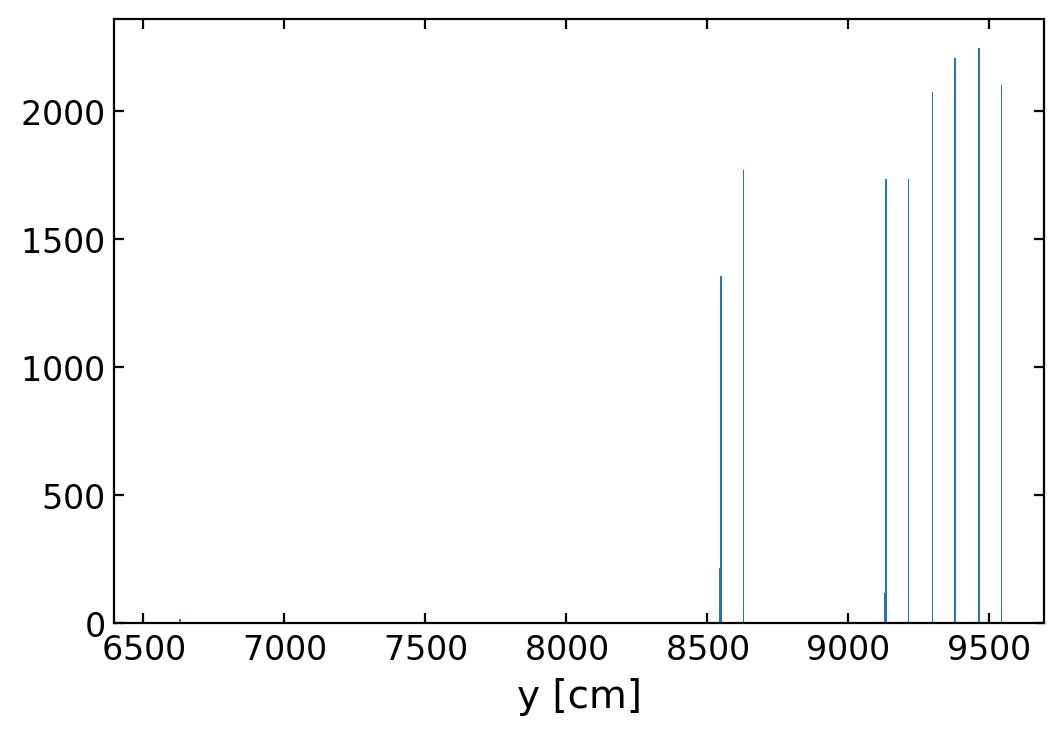

Text(0, 0.5, 'Counts')

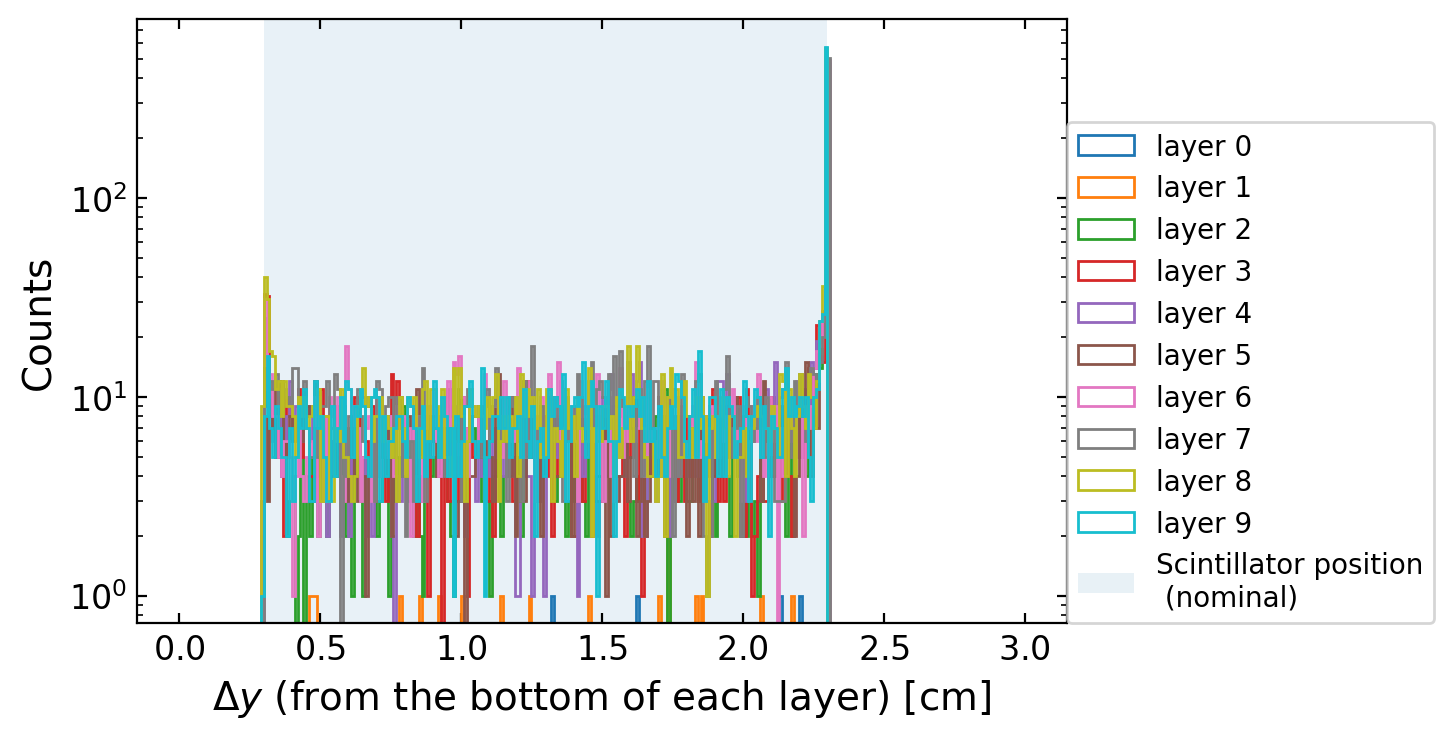

In [21]:
# figure(figsize=(12,4))
hist(y_s,bins=600);
# for y in layer_y_cms_cm:
#     axvline(y,color="r",linestyle="--")
# xlim(8500,9500)
# xlim(6500,7000)
xlabel("y [cm]")
show()


# figure(figsize=(12,4))
for iy in range(len(layer_y_cms_cm)):
    y=layer_y_cms_cm[iy]
    hist((y_s-y),bins=np.linspace(0,3,301),histtype="step",label=f"layer {iy}");
    # hist(y_s-y,bins=300,range=(2.1,2.4),histtype="step",label=f"layer {iy}");
    
axvspan(0.3,0.3+2,alpha=0.1,label="Scintillator position\n (nominal)")
# xlim(2.1, 2.4)
legend(fontsize=10,loc=(1,0))
yscale('log')
xlabel("$\Delta y$ (from the bottom of each layer) [cm]")
ylabel("Counts")
    

['NumHits', 'Hit_energy', 'Hit_time', 'Hit_detId', 'Hit_particlePdgId', 'Hit_G4TrackId', 'Hit_G4ParentTrackId', 'Hit_x', 'Hit_y', 'Hit_z', 'Hit_particleEnergy', 'Hit_particlePx', 'Hit_particlePy', 'Hit_particlePz', 'Hit_weight', 'NumGenParticles', 'GenParticle_index', 'GenParticle_G4index', 'GenParticle_pdgid', 'GenParticle_status', 'GenParticle_time', 'GenParticle_x', 'GenParticle_y', 'GenParticle_z', 'GenParticle_energy', 'GenParticle_px', 'GenParticle_py', 'GenParticle_pz', 'GenParticle_mo1', 'GenParticle_mo2', 'GenParticle_dau1', 'GenParticle_dau2', 'GenParticle_mass', 'GenParticle_pt', 'GenParticle_eta', 'GenParticle_phi', 'COSMIC_EVENT_ID', 'COSMIC_CORE_X', 'COSMIC_CORE_Y', 'COSMIC_GEN_PRIMARY_ENERGY', 'COSMIC_GEN_THETA', 'COSMIC_GEN_PHI', 'COSMIC_GEN_FIRST_HEIGHT', 'COSMIC_GEN_ELECTRON_COUNT', 'COSMIC_GEN_MUON_COUNT', 'COSMIC_GEN_HADRON_COUNT', 'COSMIC_GEN_PRIMARY_ID', 'EXTRA_11', 'EXTRA_12', 'EXTRA_13', 'EXTRA_14', 'EXTRA_15']


(0.0, 10.0)

findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['san-serif'] not found. Falling back to DejaVu Sans.


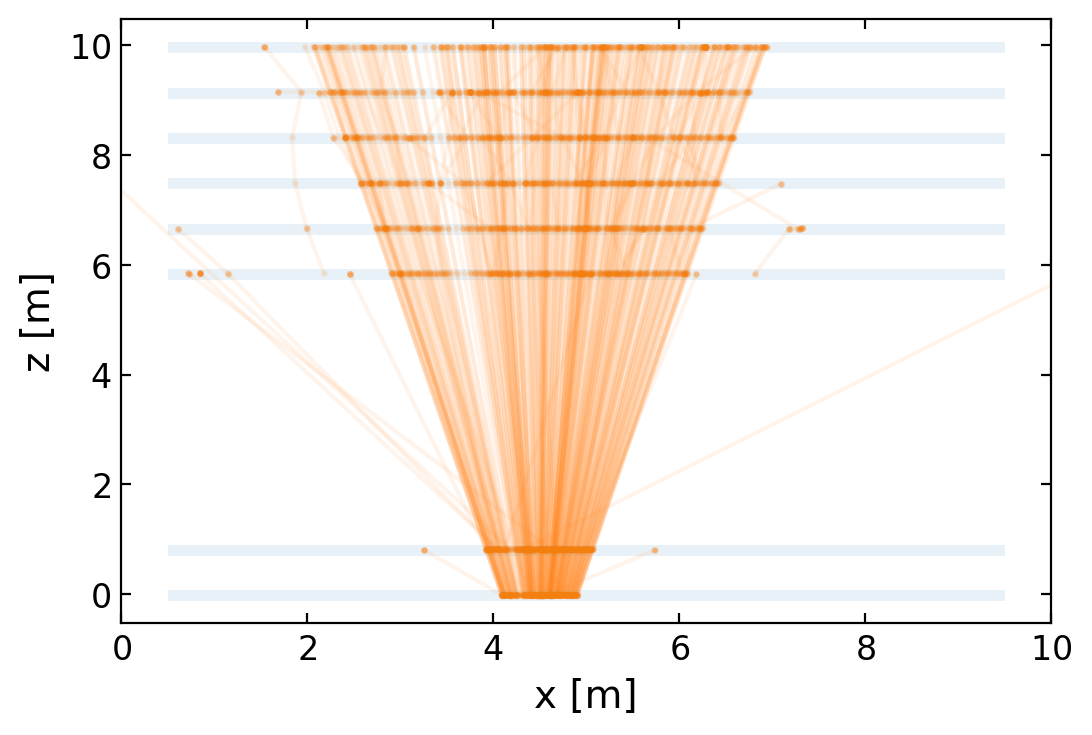

In [8]:
tfile = root.TFile.Open(filename)
Tree = tfile.Get(tree_name)

barnches = Tree.GetListOfBranches()
nevents = int(Tree.GetEntries())
branch_list = [barnches[i].GetName() for i in range(len(barnches))]
print(branch_list)

ev = event.Event(filename, 0, tree_name=tree_name)
# for i in range(nevents):
for i in range(300):
# for i in [8,9]:
#     ev = event.Event(filename, i, tree_name=tree_name)
    ev.EventNumber=i

    tracks=ev.get_truthtrack()
    if len(tracks)>0:
        for track in tracks:
            track=util.coord_cms2det(track)
            # plt.plot(track[0],track[2],marker=".",color="grey",alpha=0.1)
            plt.plot(track[1],track[2],marker=".",color="C1",alpha=0.08,markersize=3)    
        
    plt.xlabel('x [m]')
    plt.ylabel('z [m]')
    
vis.drawdet_xz()
xlim(0,10)
# savefig("muon_eventview_300")

In [11]:
filename_fit = os.path.dirname(filename)+"/stat0.root"
tree_name_fit="integral_tree"

tfile = root.TFile.Open(filename_fit)
Tree = tfile.Get(tree_name_fit)


barnches = Tree.GetListOfBranches()
nevents = int(Tree.GetEntries())
branch_list = [barnches[i].GetName() for i in range(len(barnches))]
print(branch_list)

['NumHits', 'Hit_energy', 'Hit_time', 'Hit_detId', 'Hit_particlePdgId', 'Hit_G4TrackId', 'Hit_G4ParentTrackId', 'Hit_x', 'Hit_y', 'Hit_z', 'Hit_particleEnergy', 'Hit_particlePx', 'Hit_particlePy', 'Hit_particlePz', 'Digi_numHits', 'Digi_time', 'Digi_x', 'Digi_y', 'Digi_z', 'Digi_energy', 'Digi_px', 'Digi_py', 'Digi_pz', 'Digi_particle_energy', 'Digi_pdg_id', 'Digi_seed', 'GenParticle_index', 'GenParticle_G4index', 'GenParticle_pdgid', 'GenParticle_time', 'GenParticle_x', 'GenParticle_y', 'GenParticle_z', 'GenParticle_energy', 'GenParticle_px', 'GenParticle_py', 'GenParticle_pz', 'GenParticle_mass', 'G4KLong_code', 'EXTRA_12', 'EXTRA_13', 'EXTRA_14', 'EXTRA_15', 'Vertex_k_m_t', 'Vertex_k_m_x', 'Vertex_k_m_y', 'Vertex_k_m_z', 'Vertex_k_m_ErrorT', 'Vertex_k_m_ErrorX', 'Vertex_k_m_ErrorY', 'Vertex_k_m_ErrorZ', 'vertex_k_m_chi2', 'Vertex_k_m_trackIndices', 'NumVertices_k_m', 'Track_k_m_velX', 'Track_k_m_velY', 'Track_k_m_velZ', 'Track_k_m_x0', 'Track_k_m_y0', 'Track_k_m_z0', 'Track_k_m_t0',

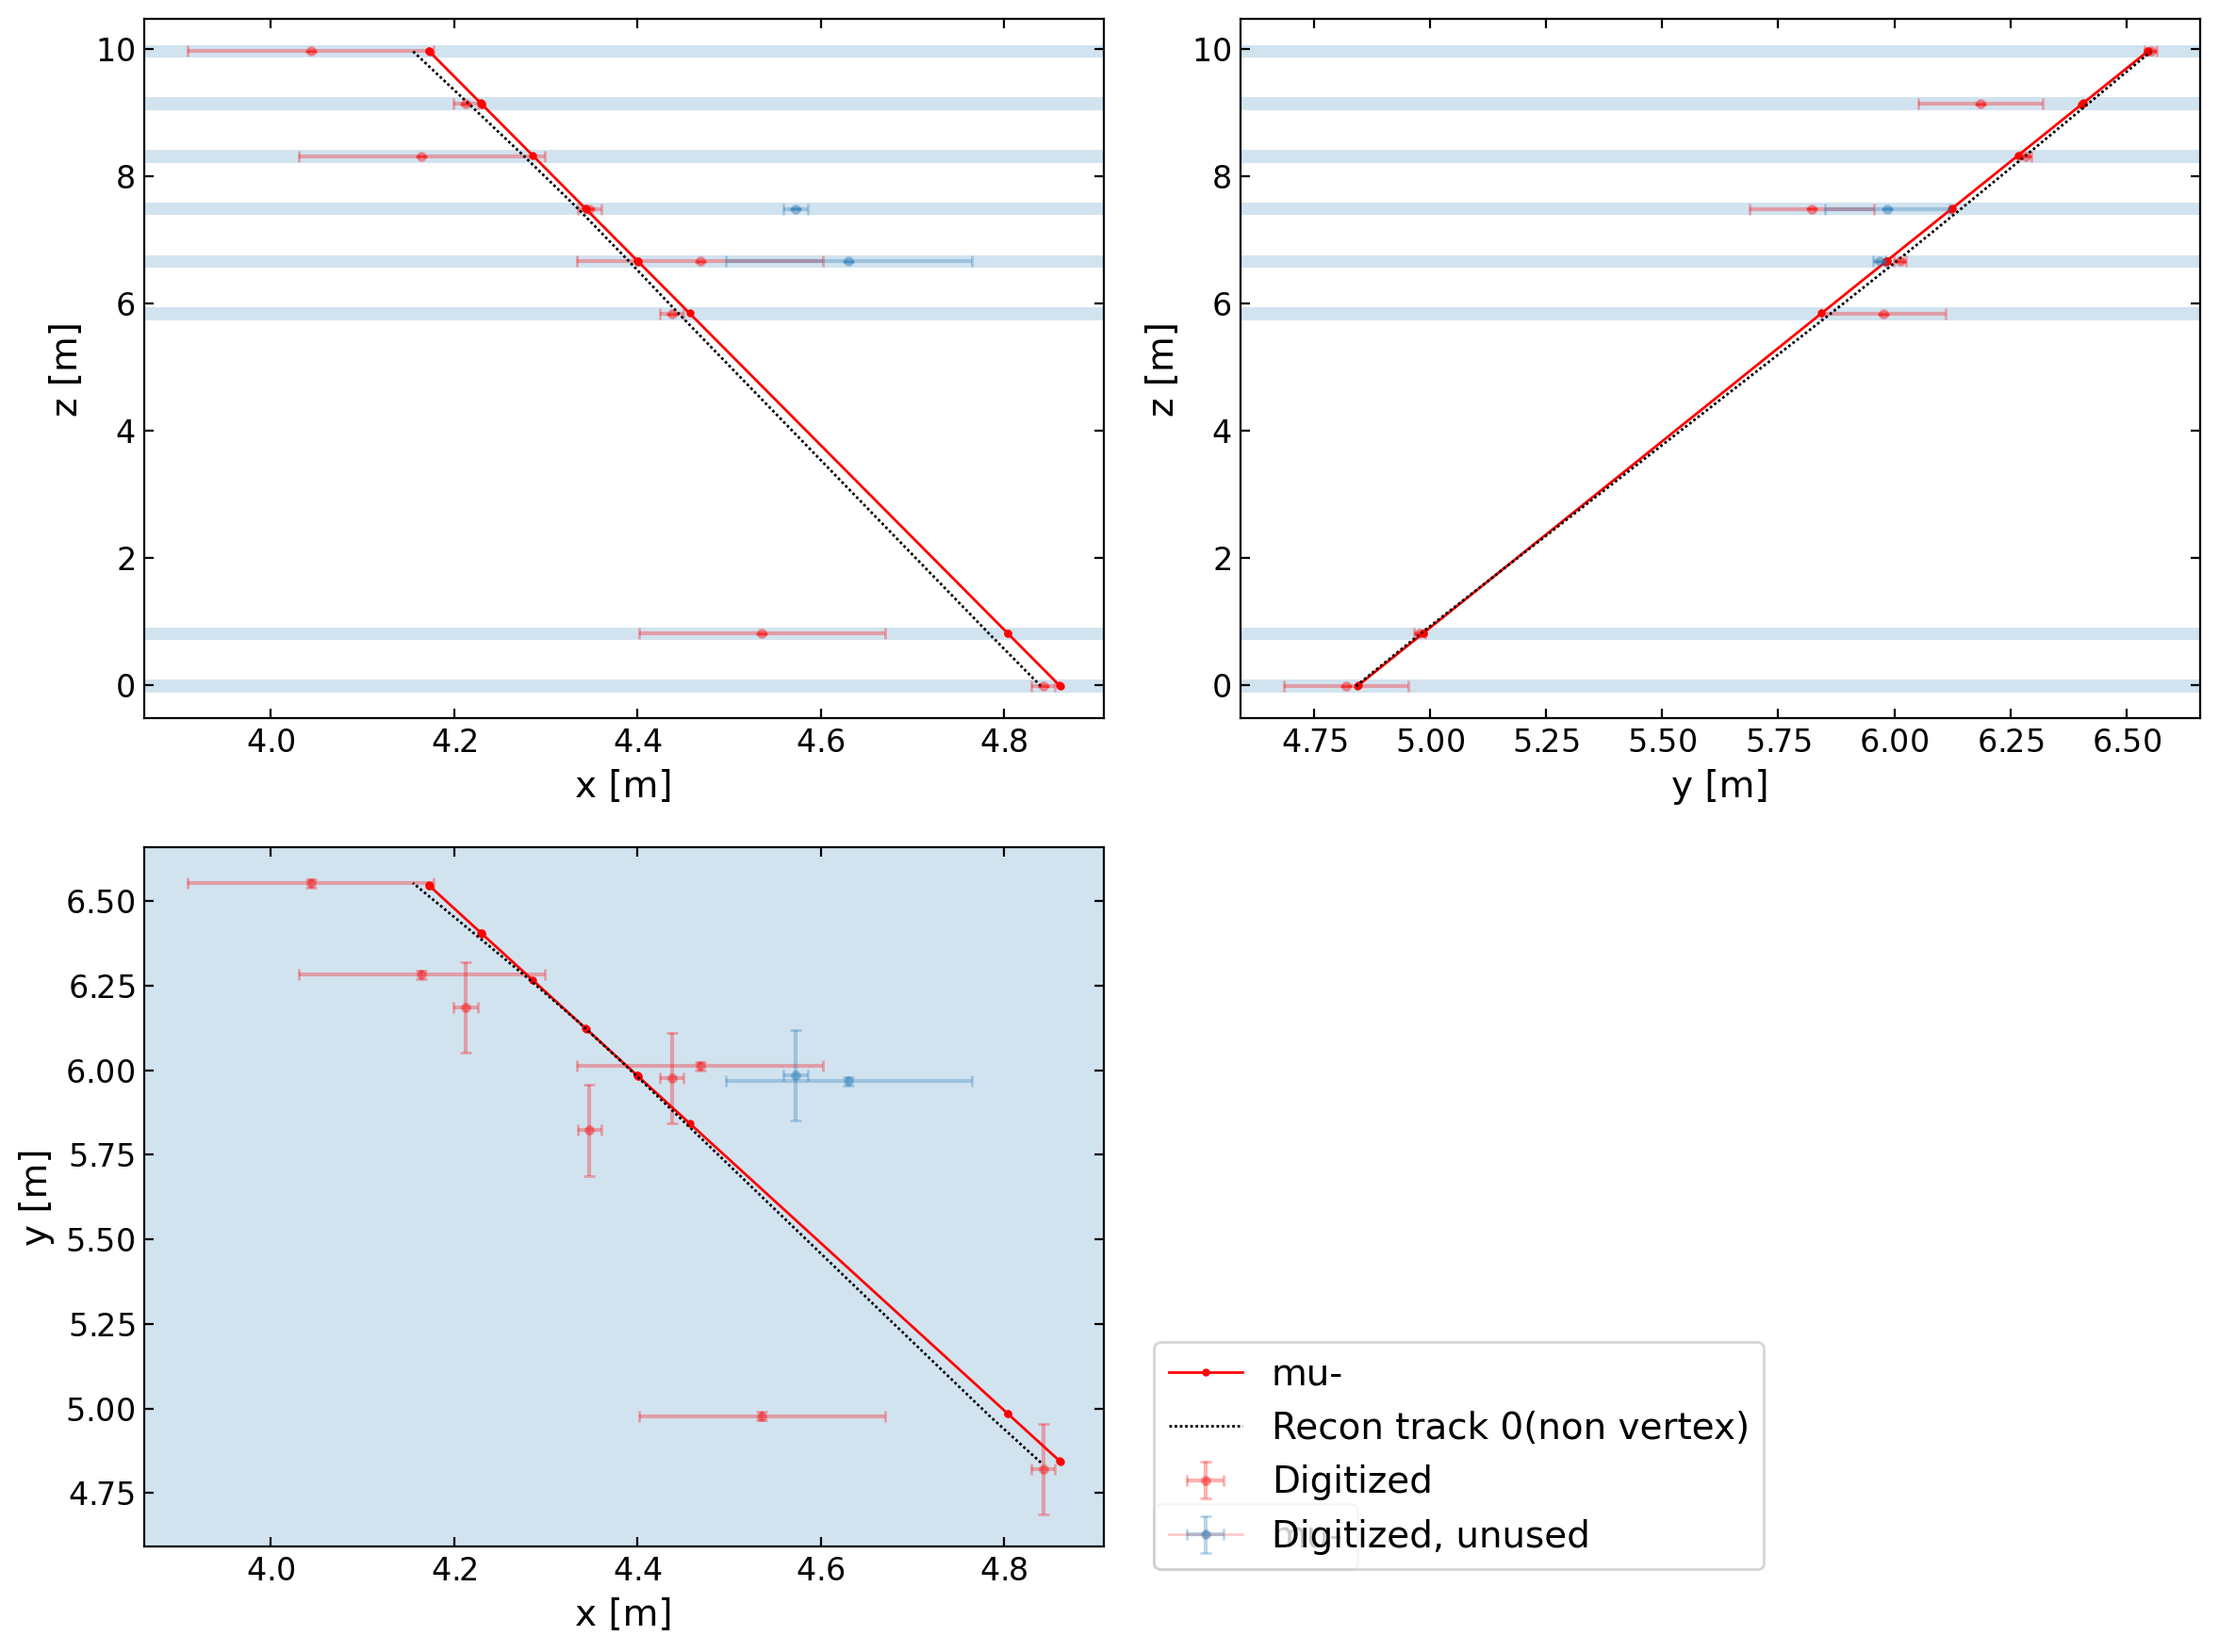

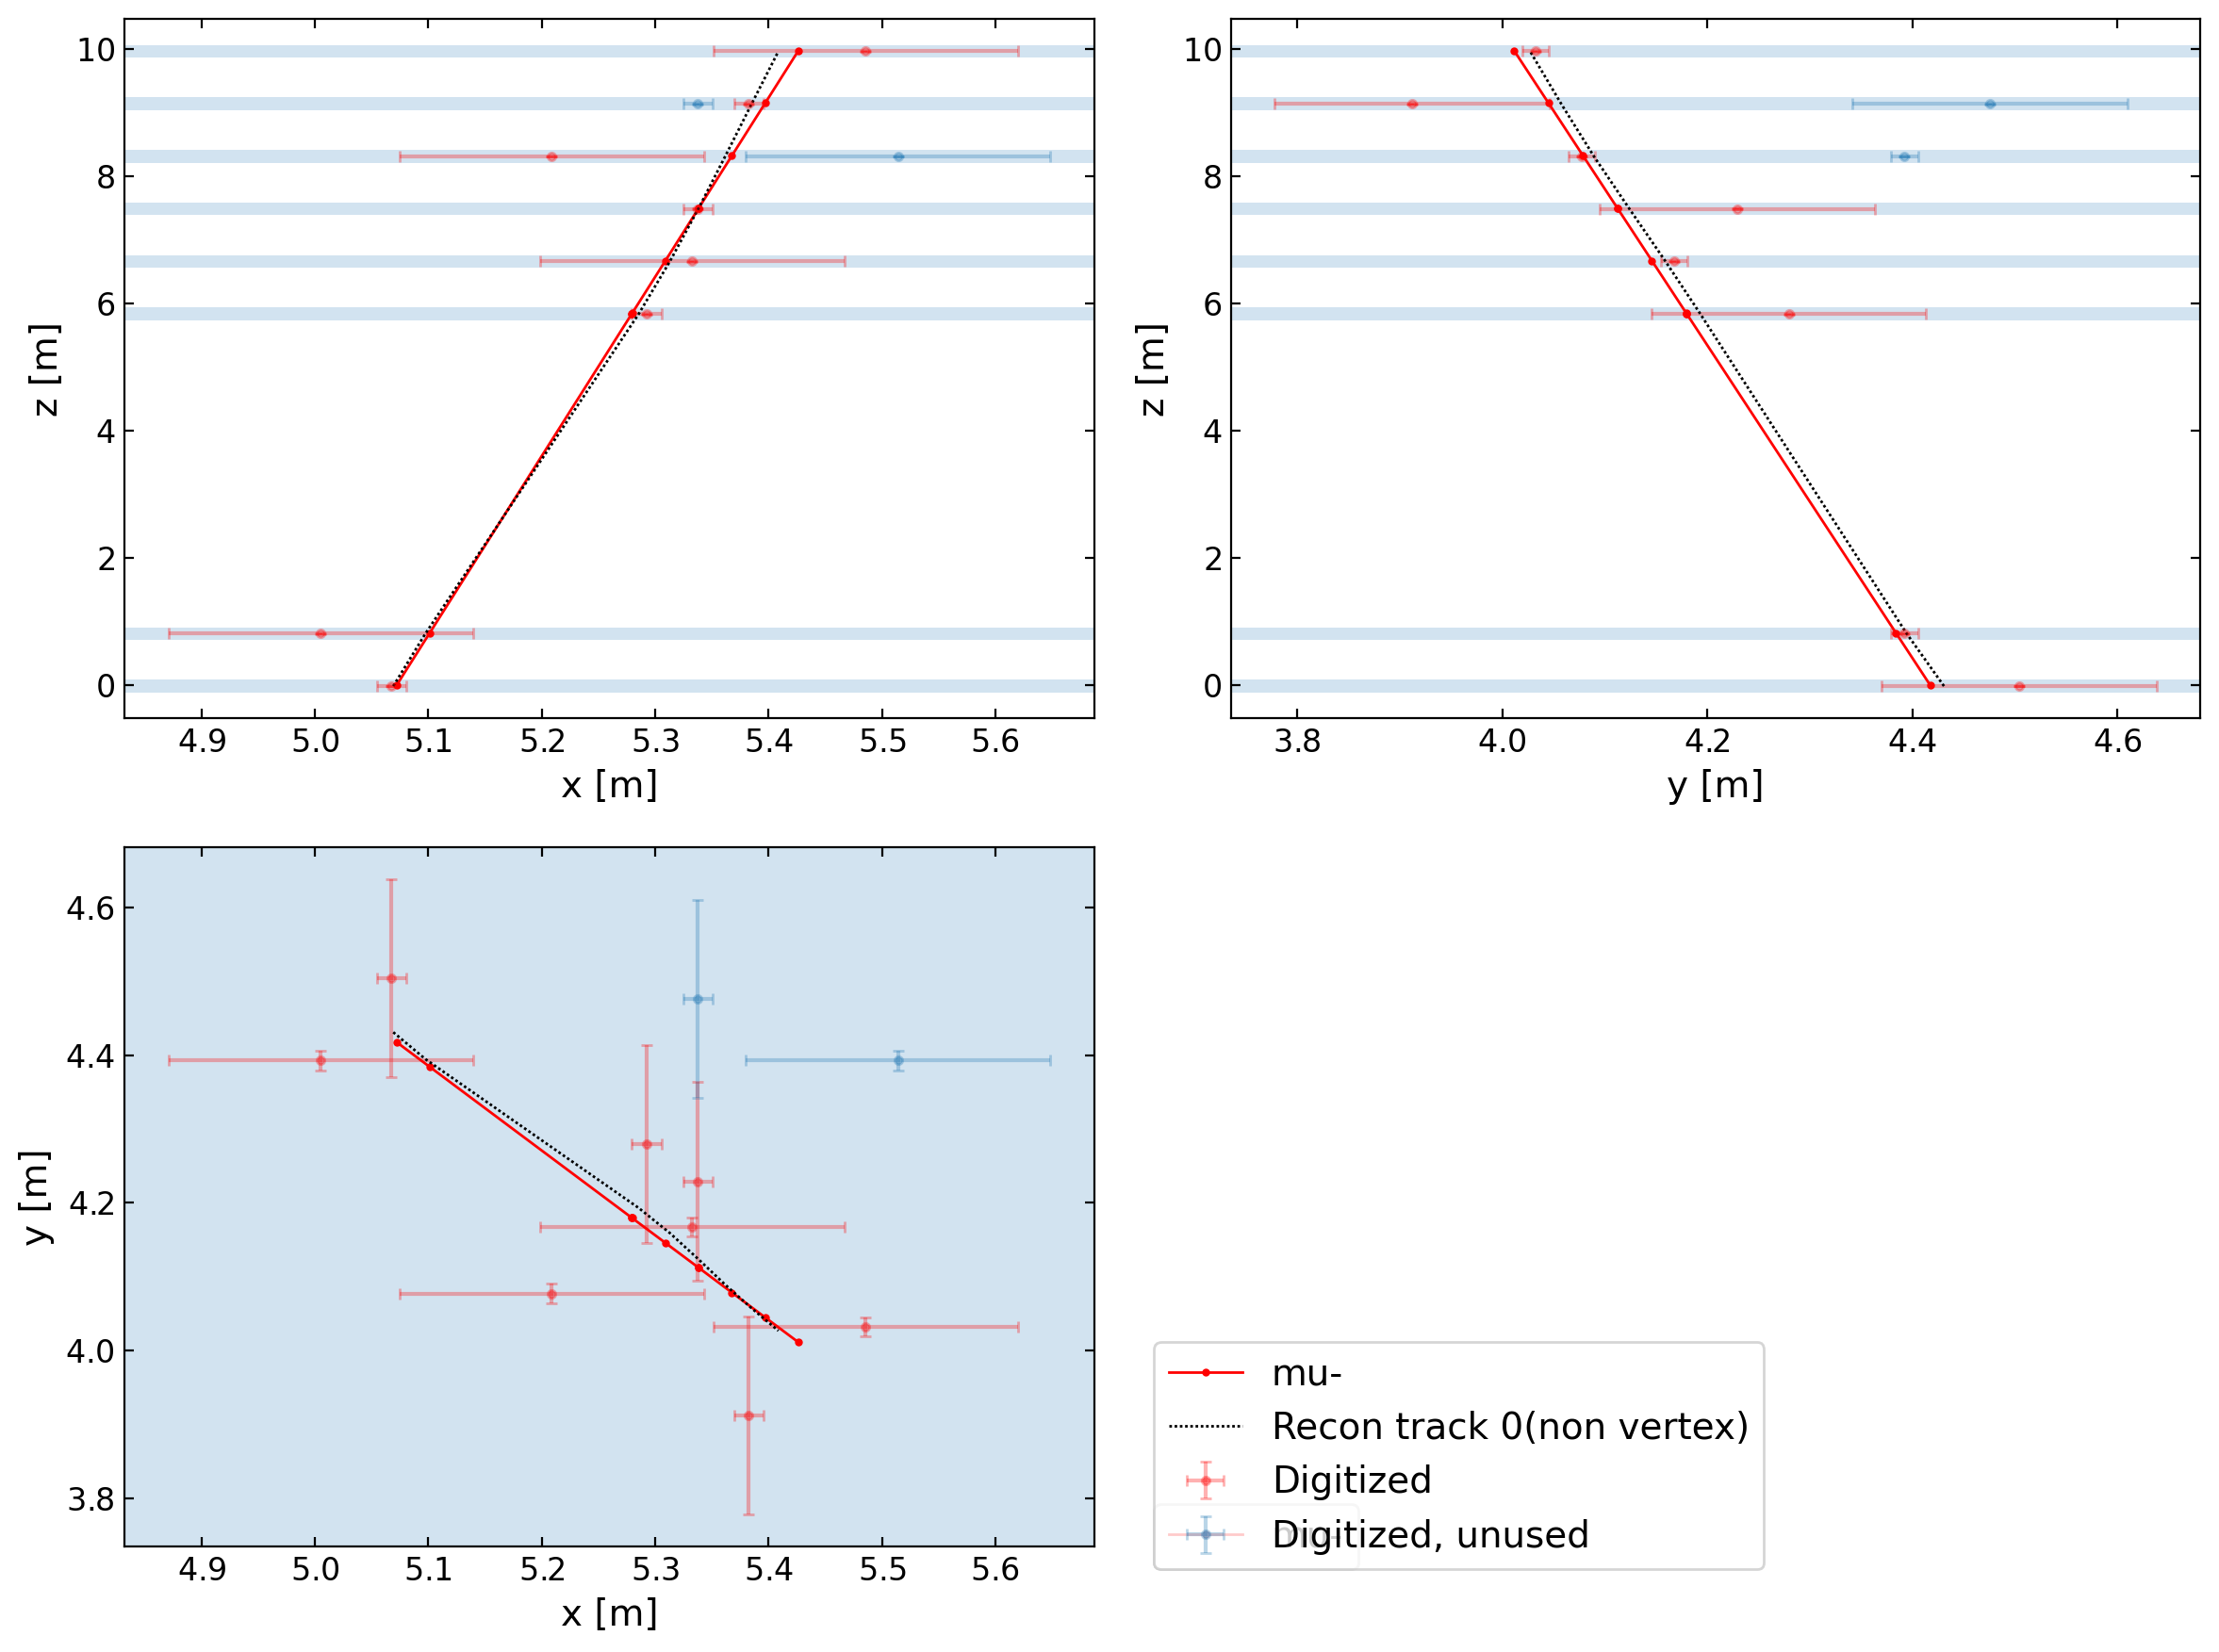

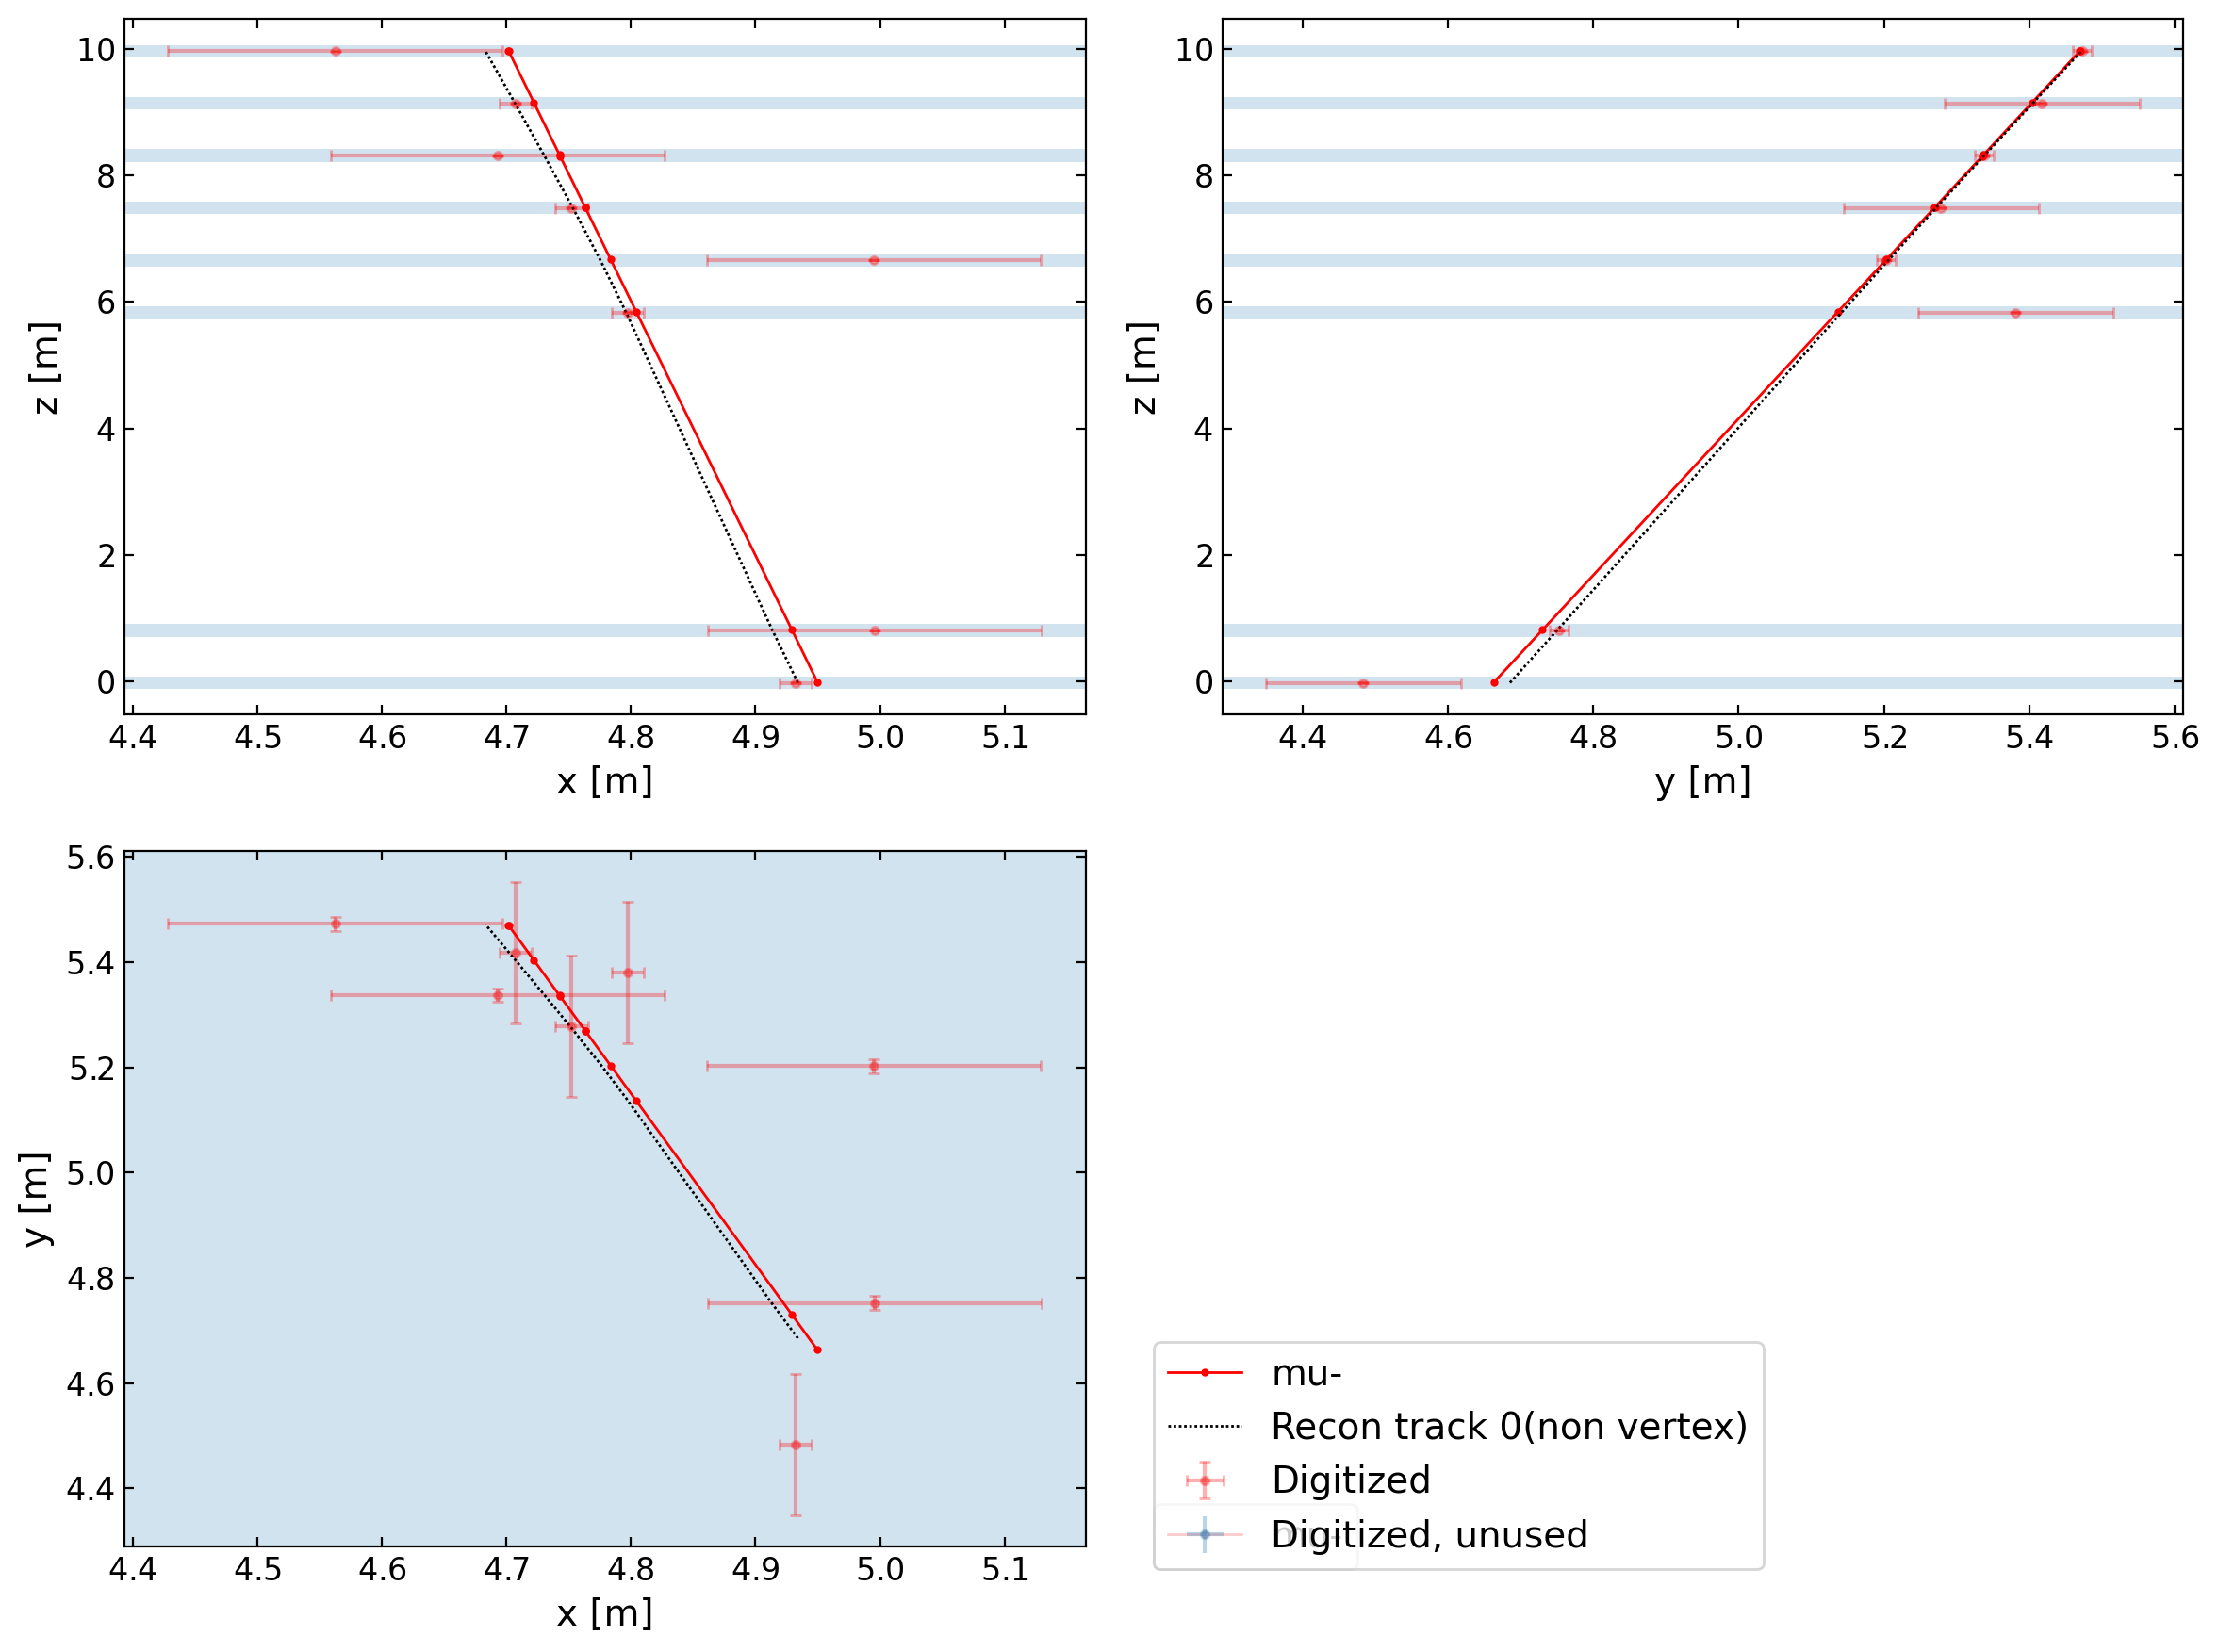

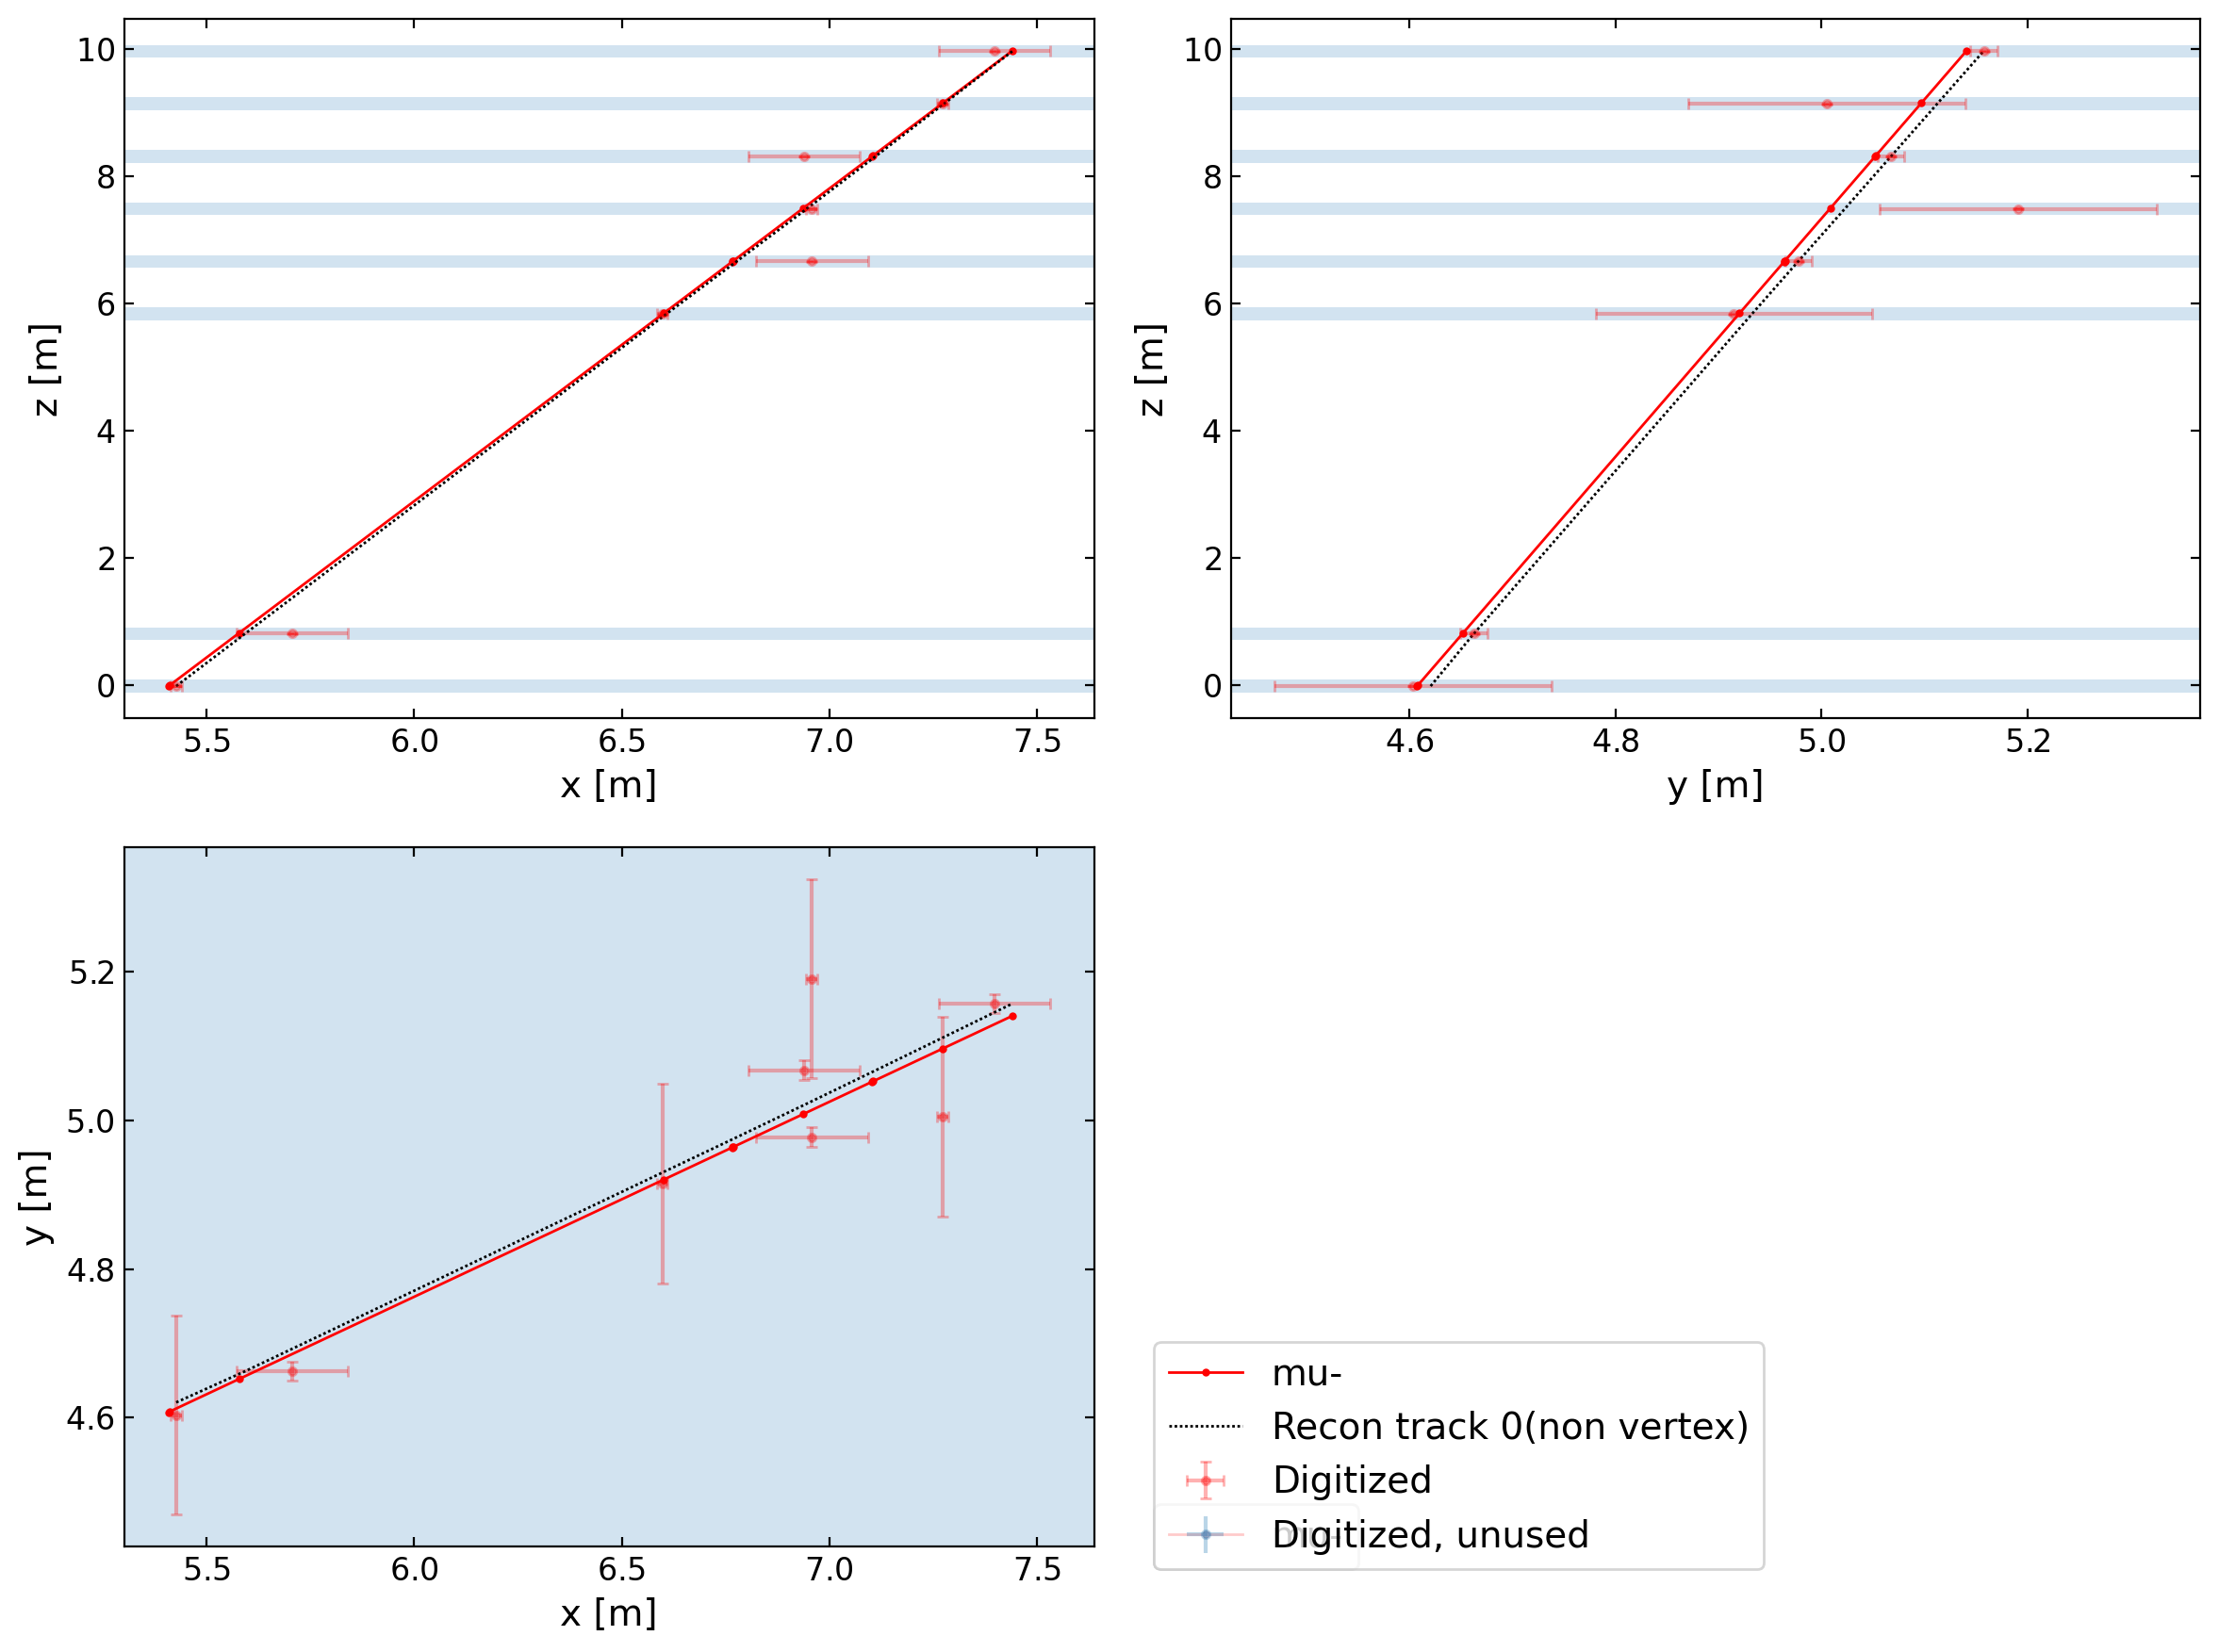

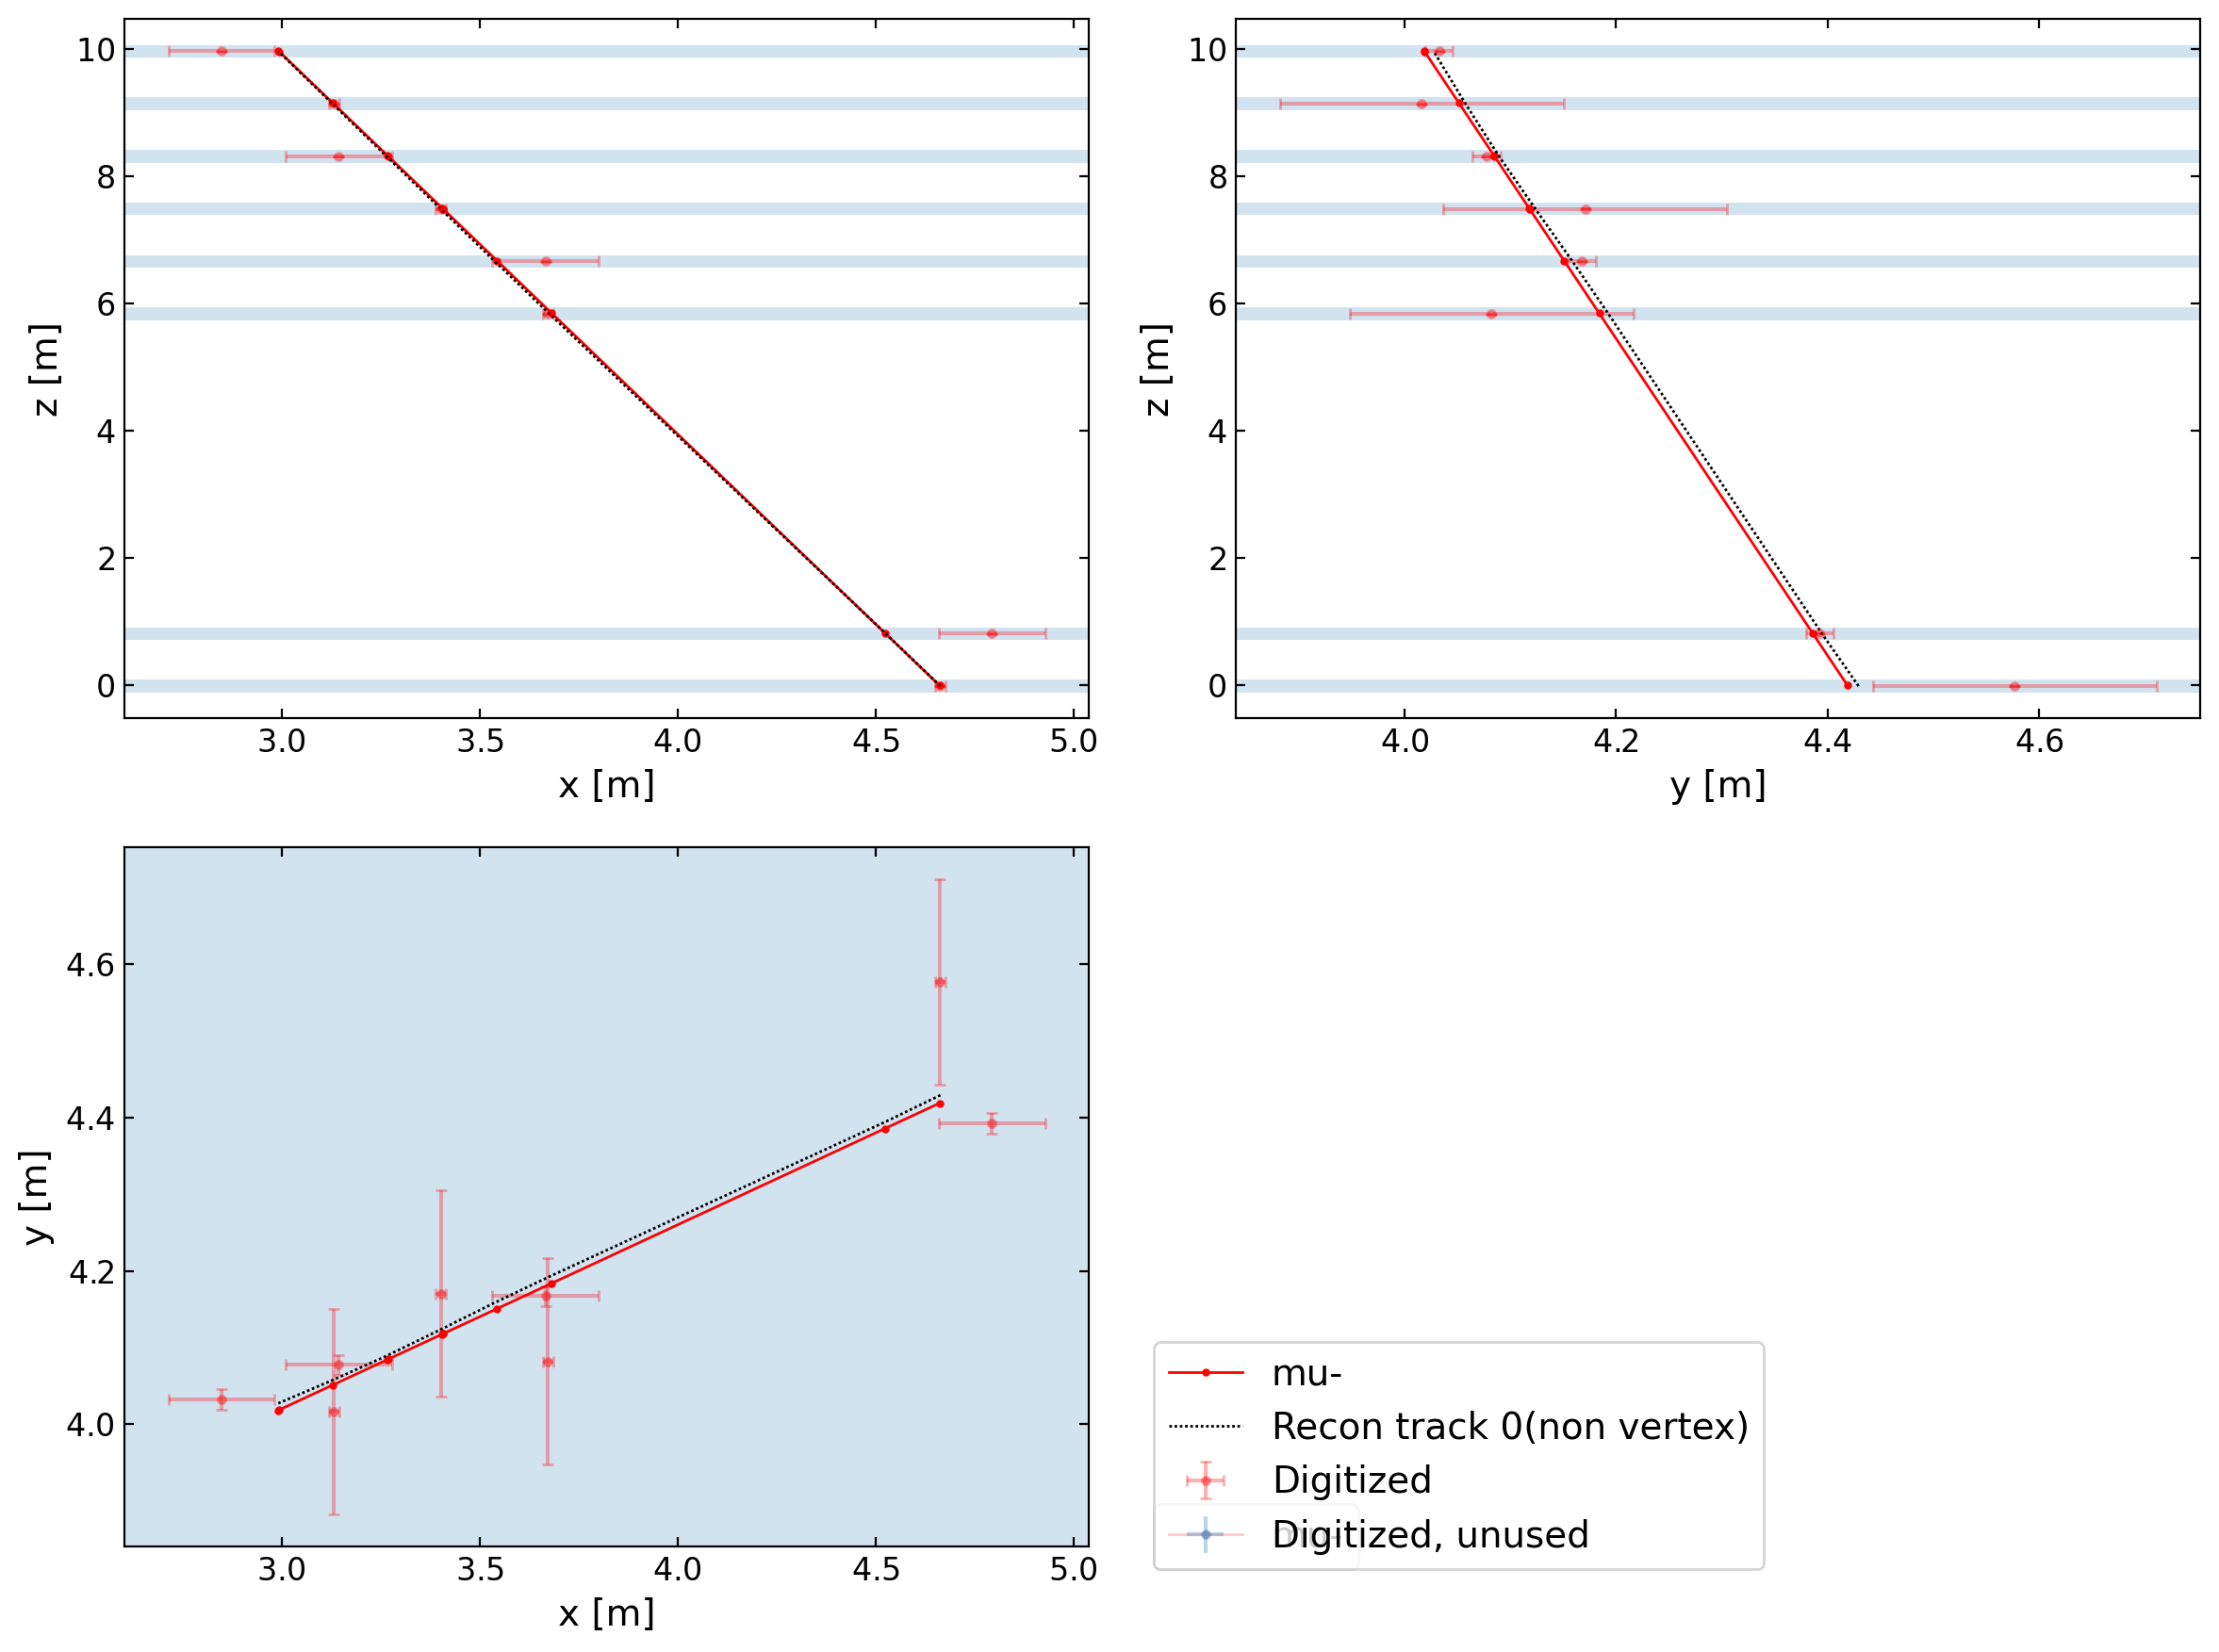

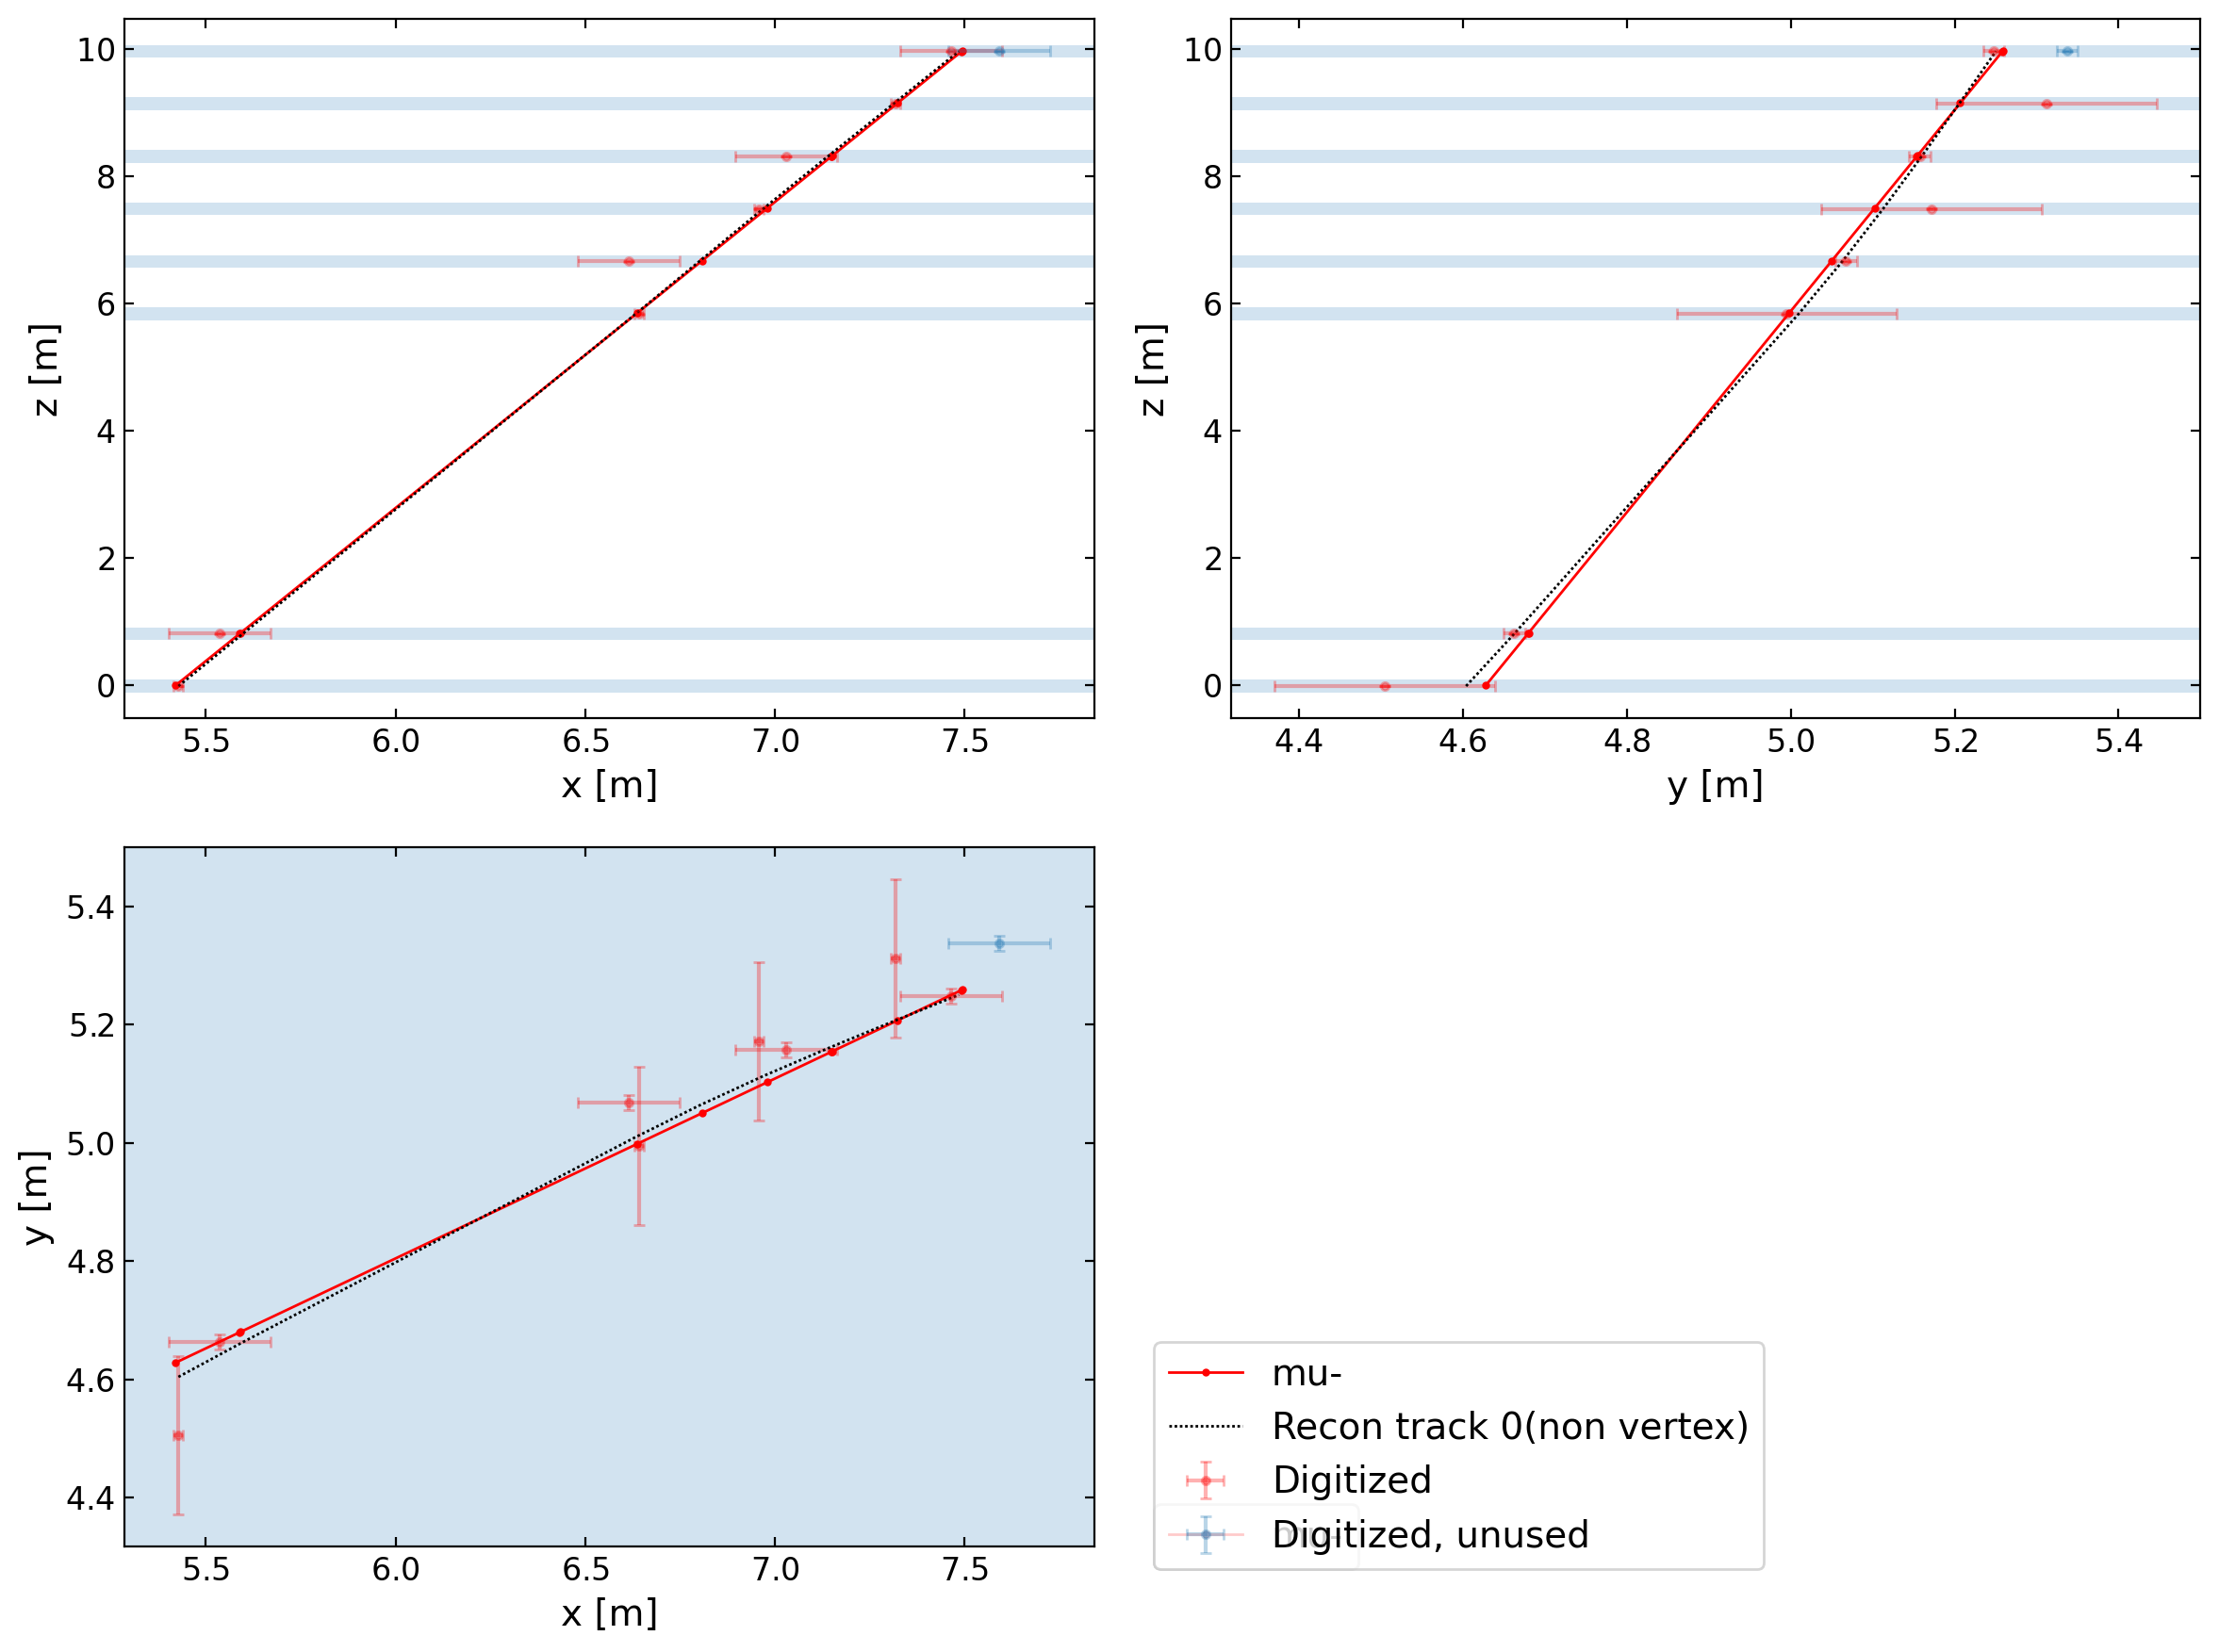

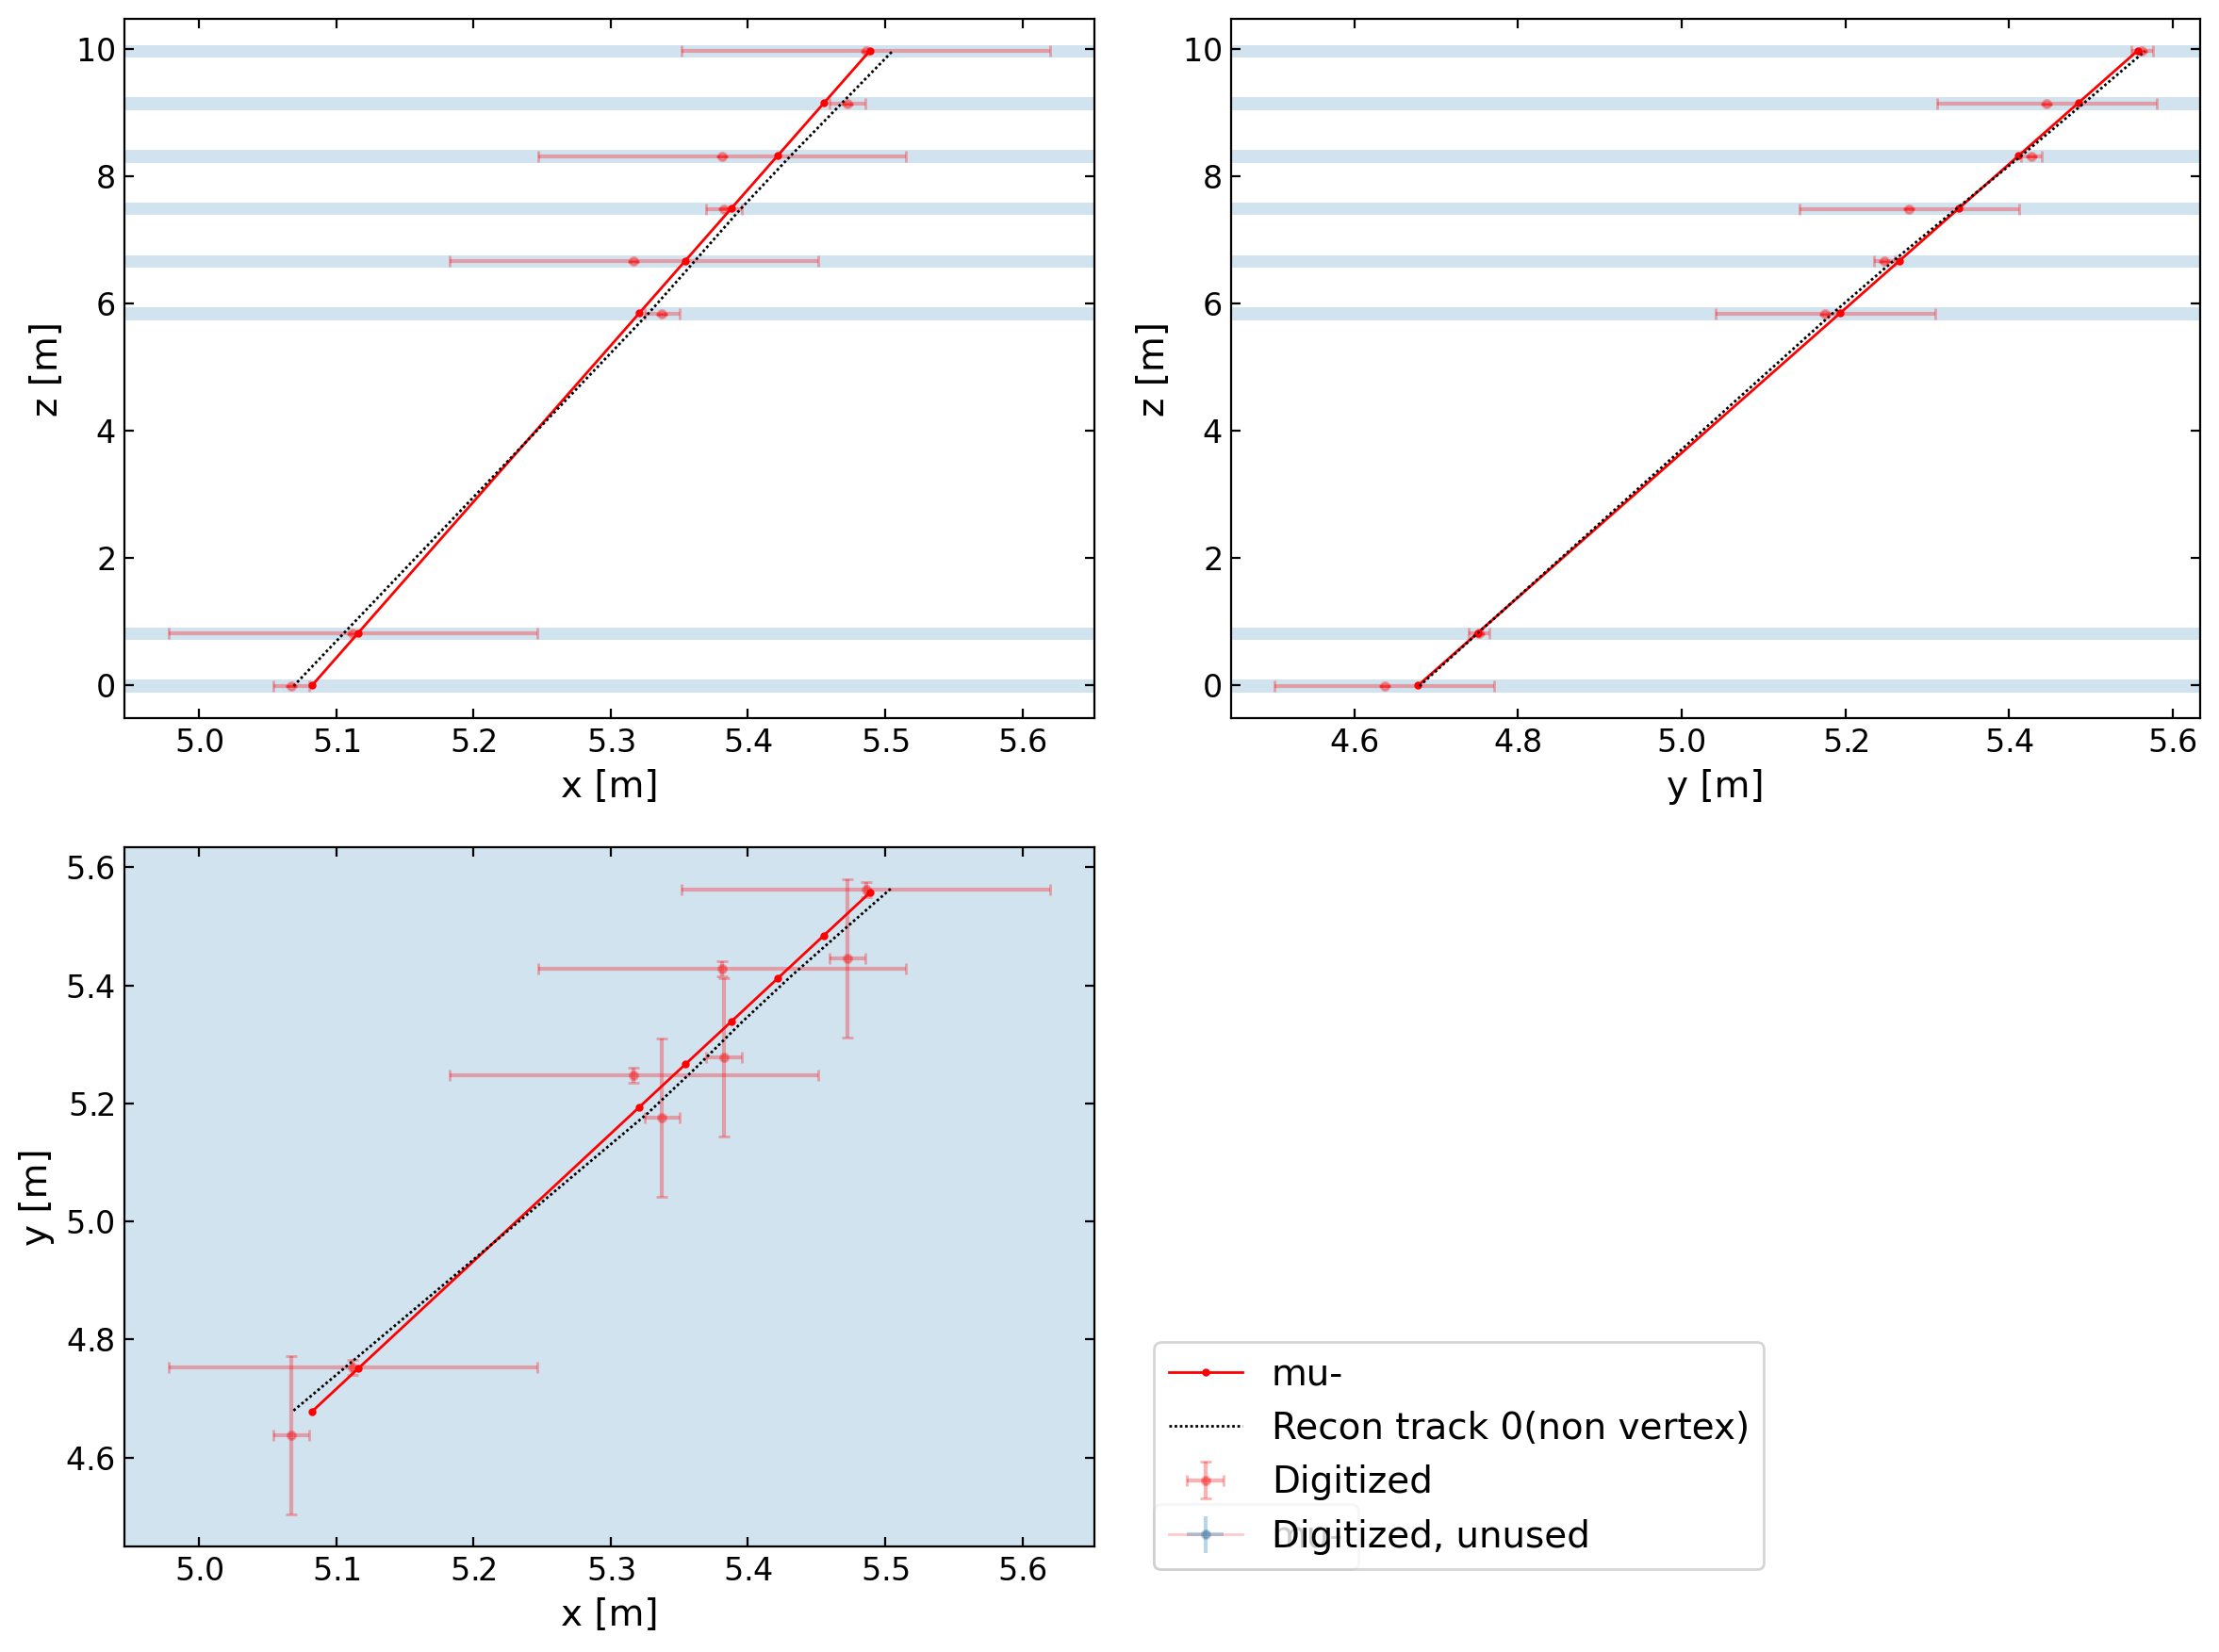

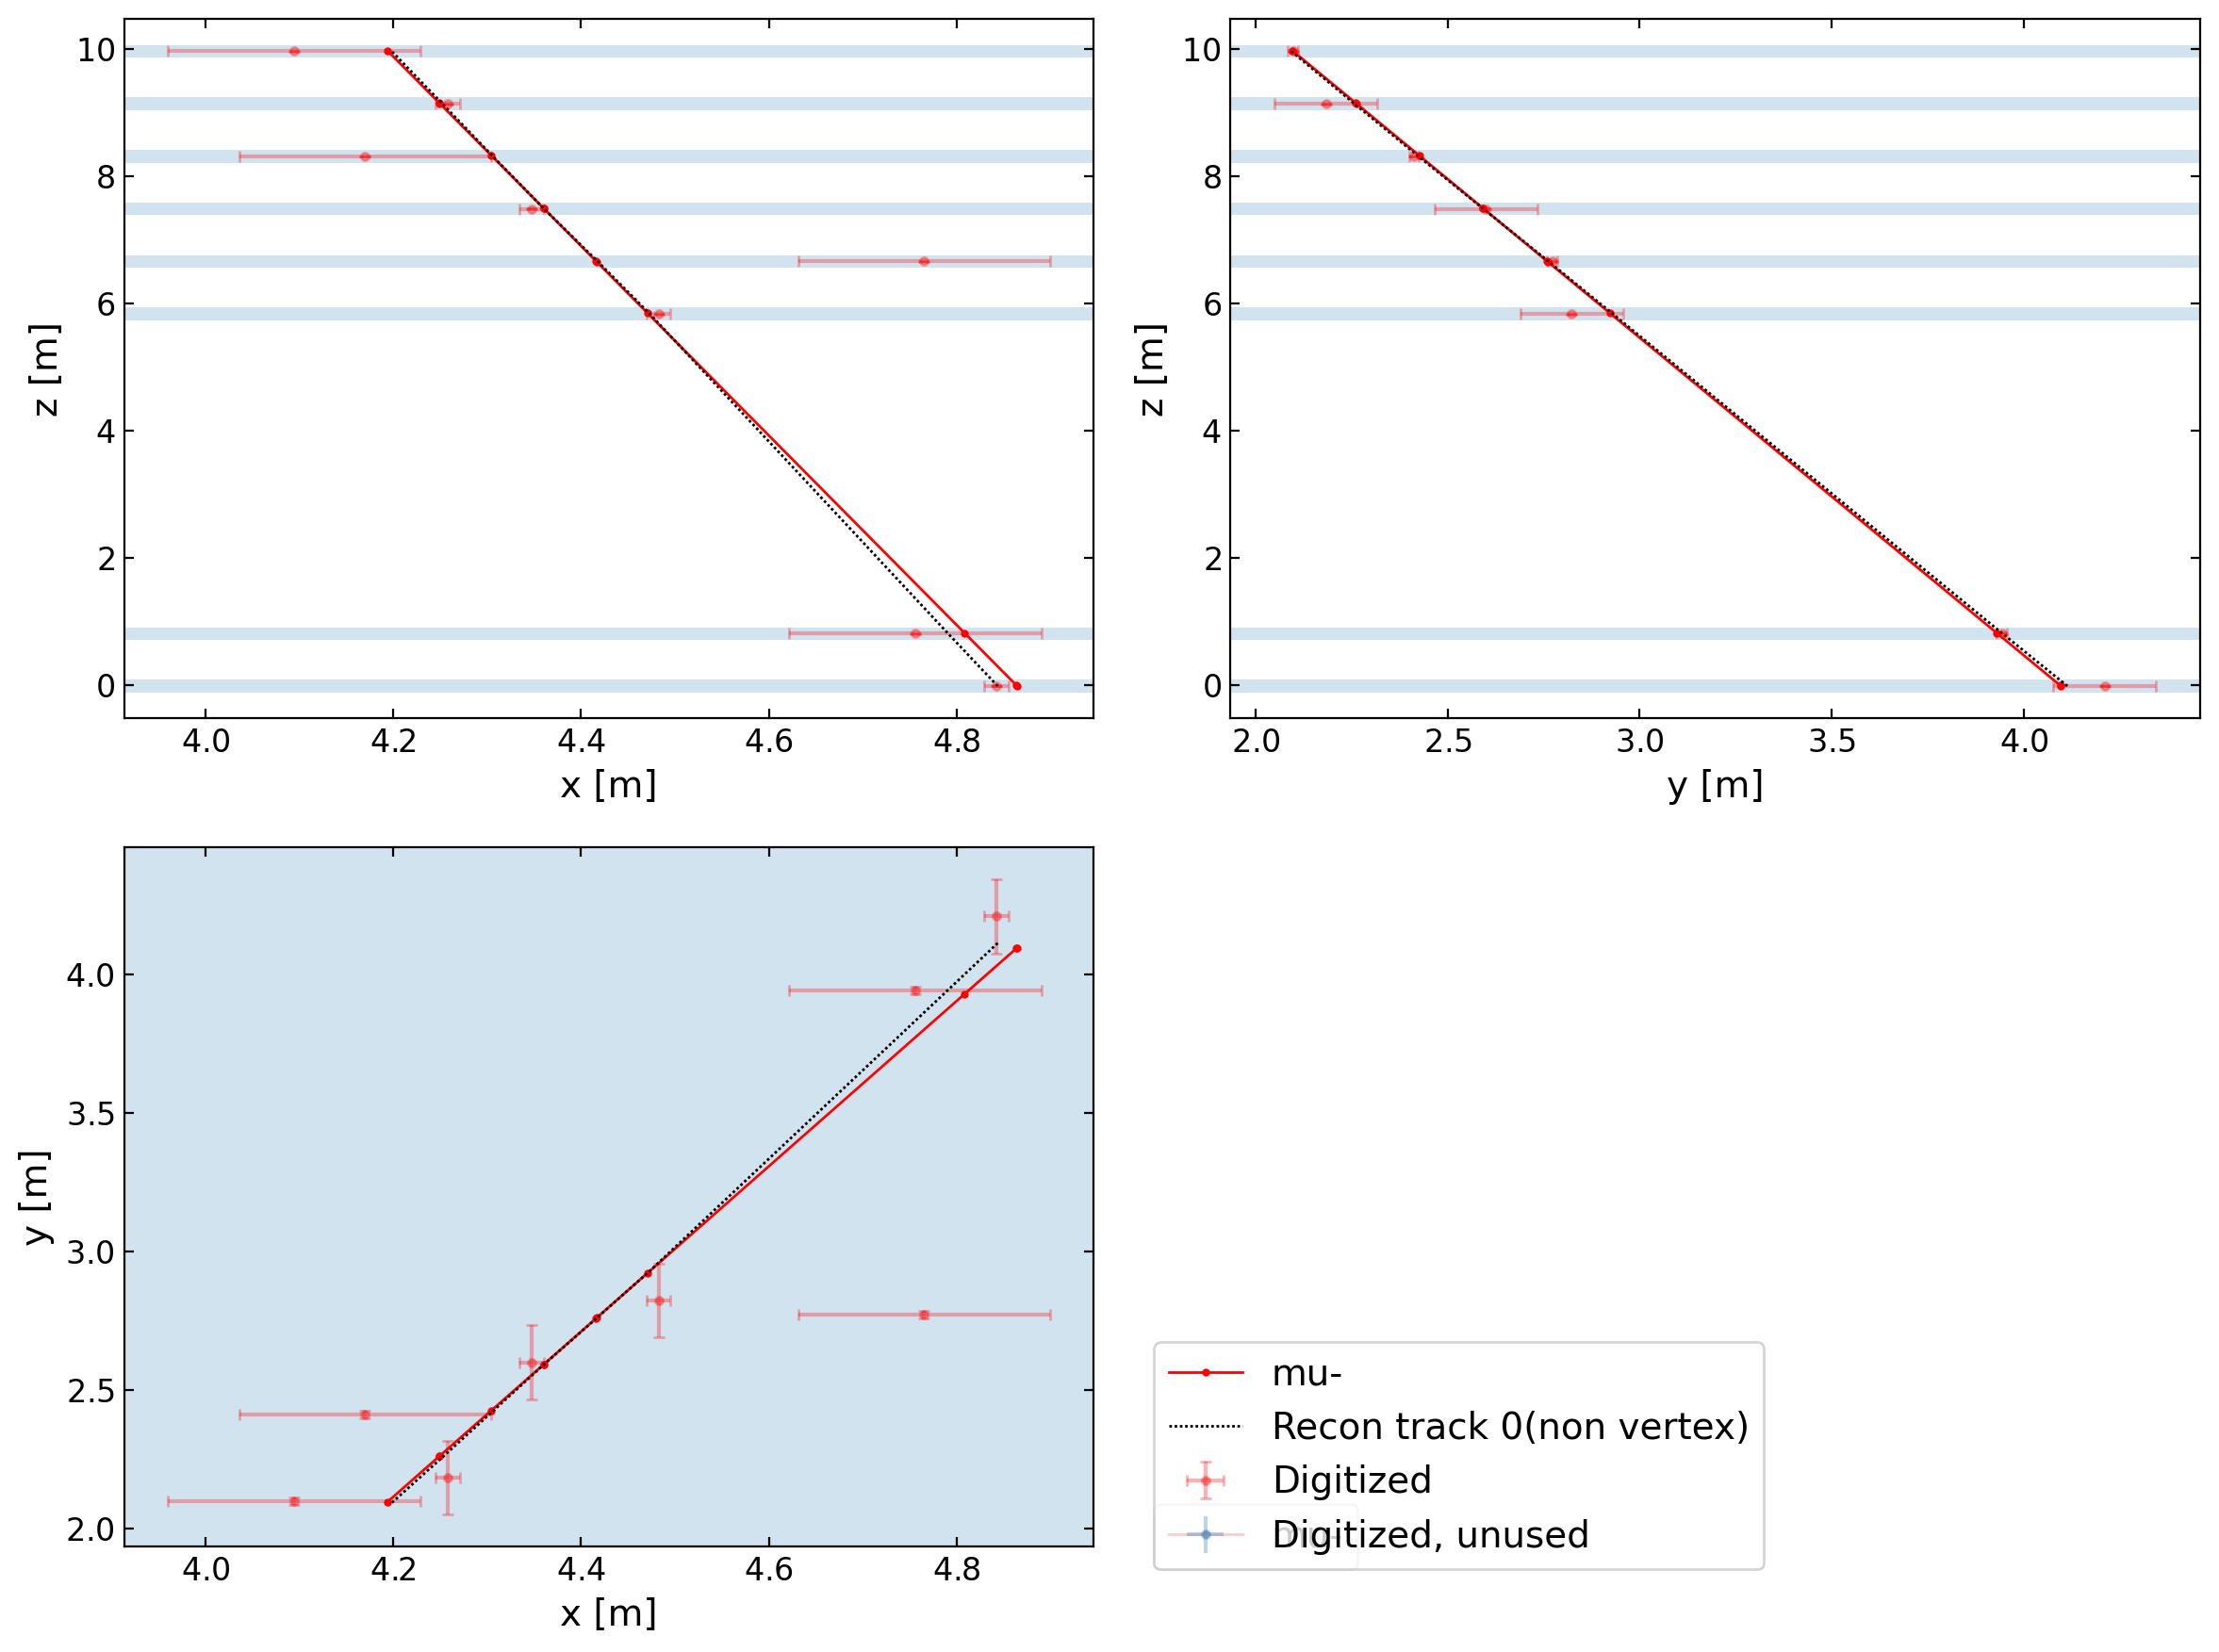

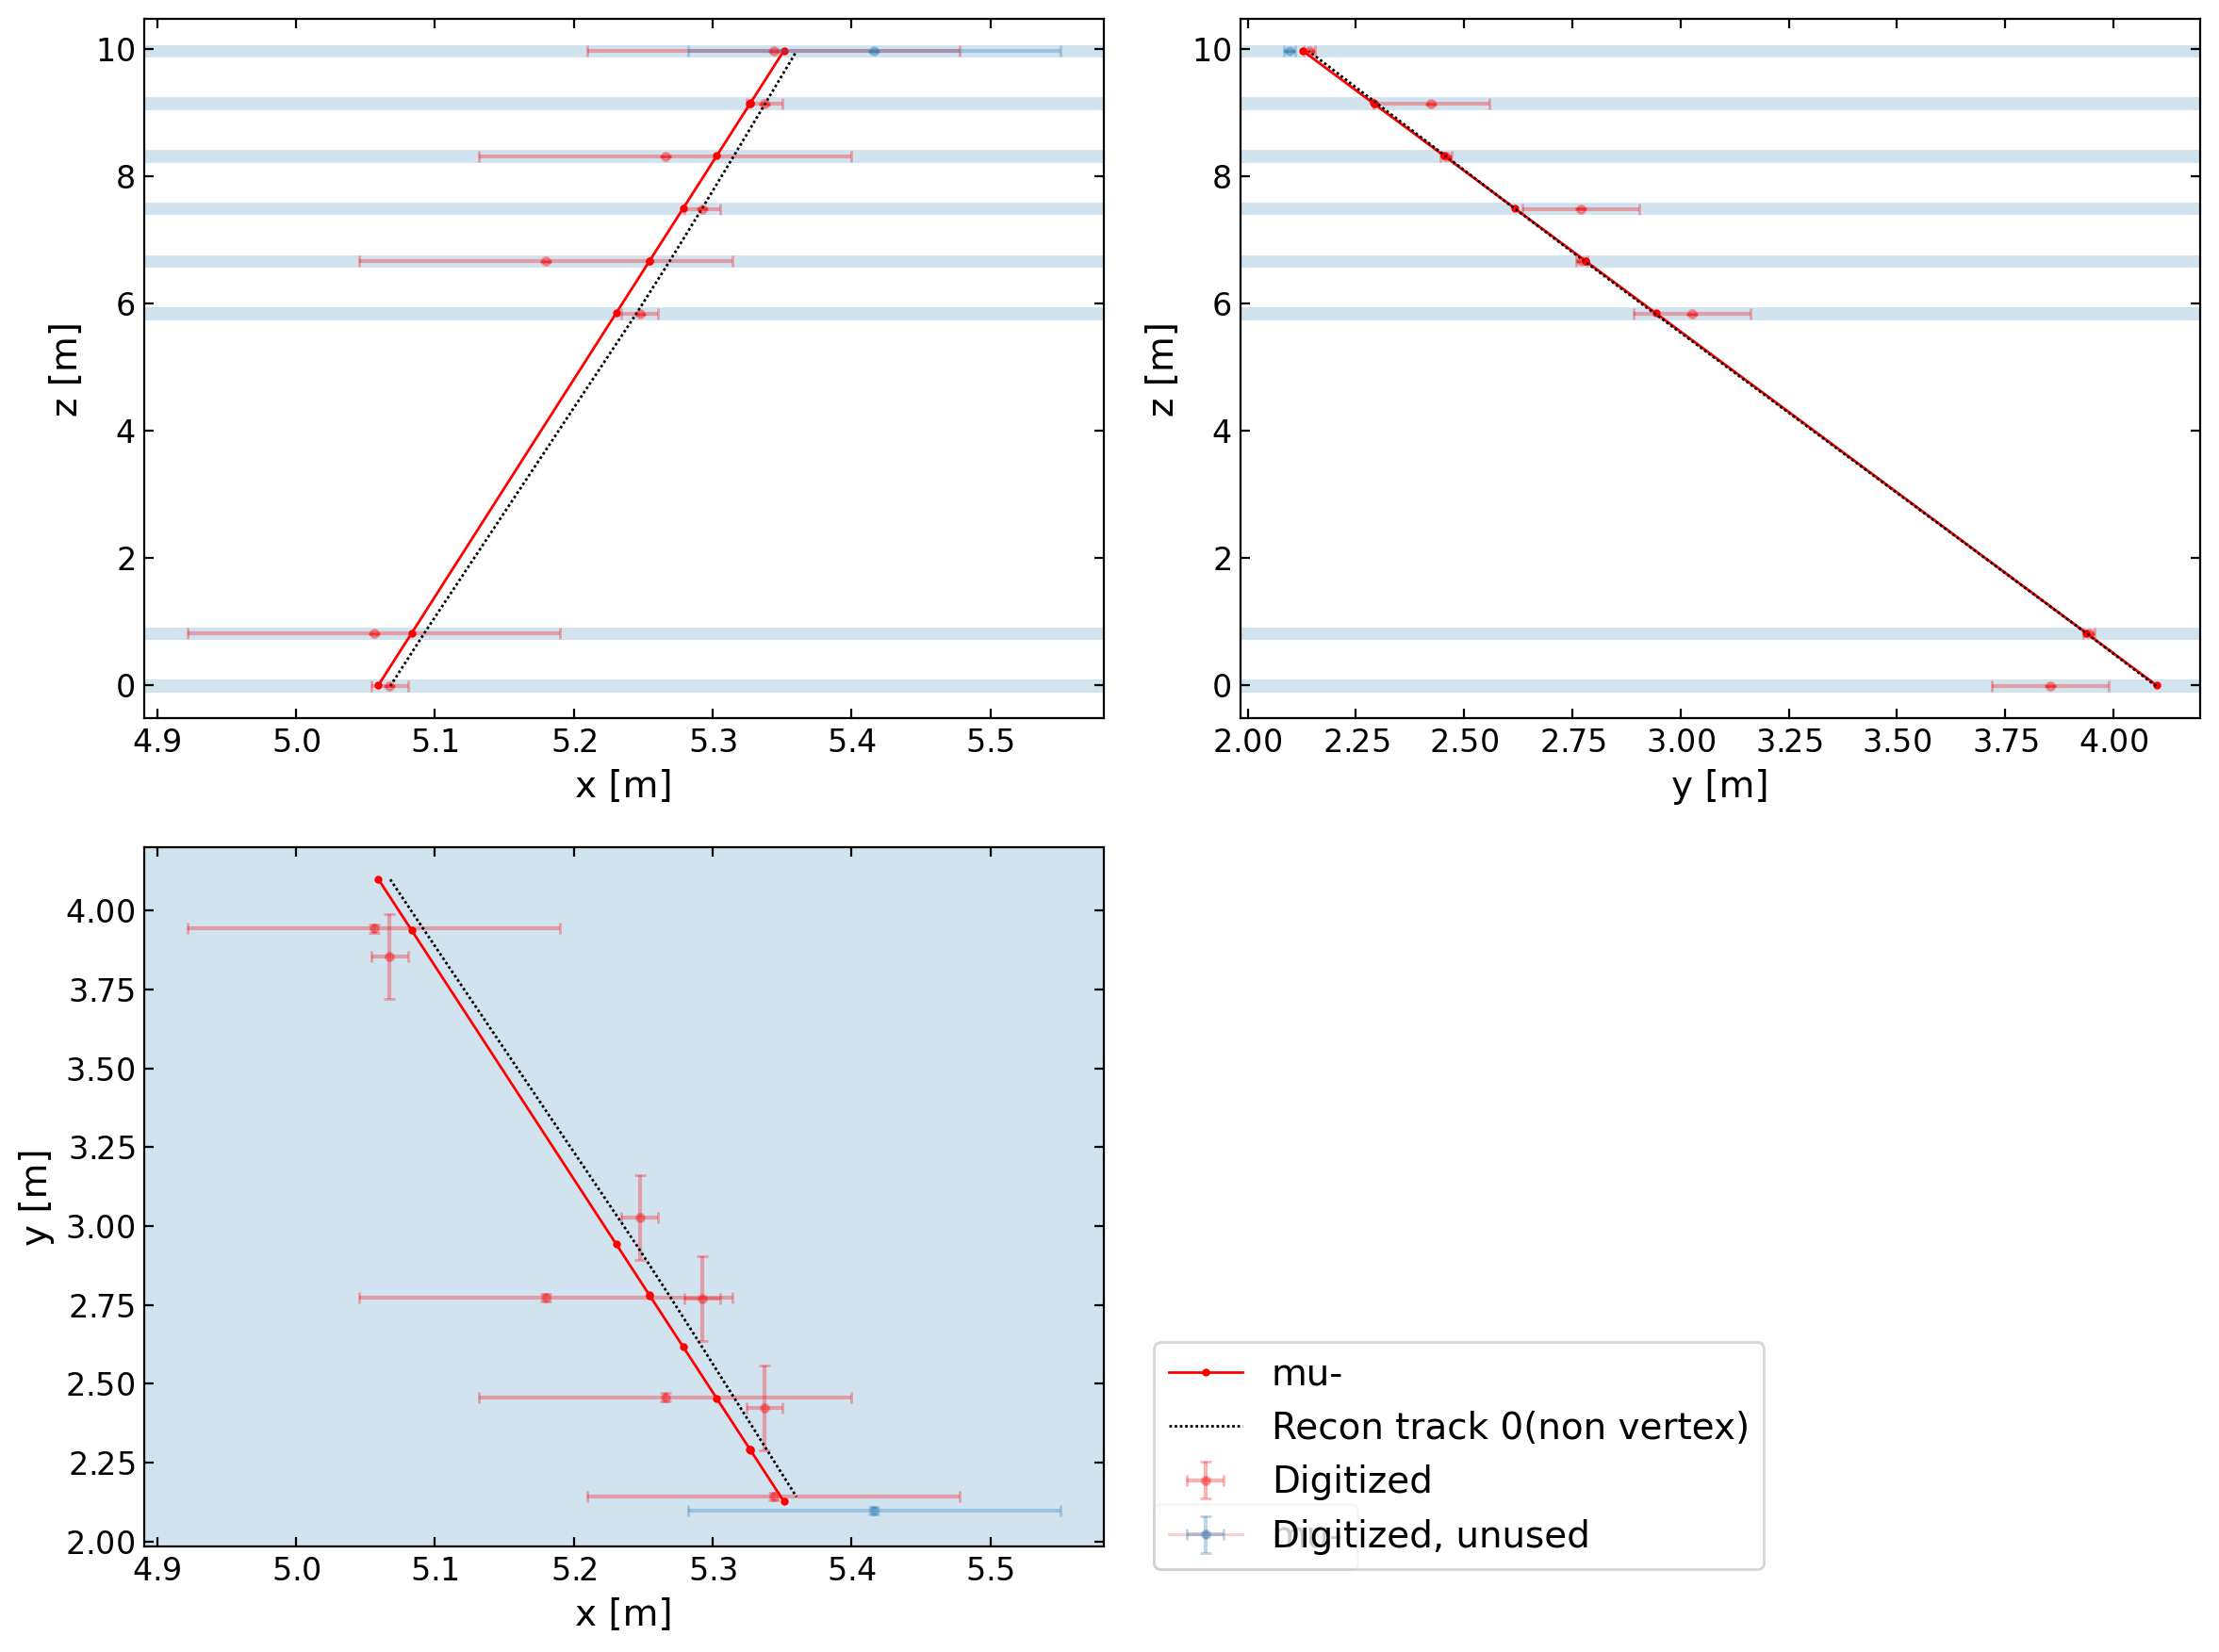

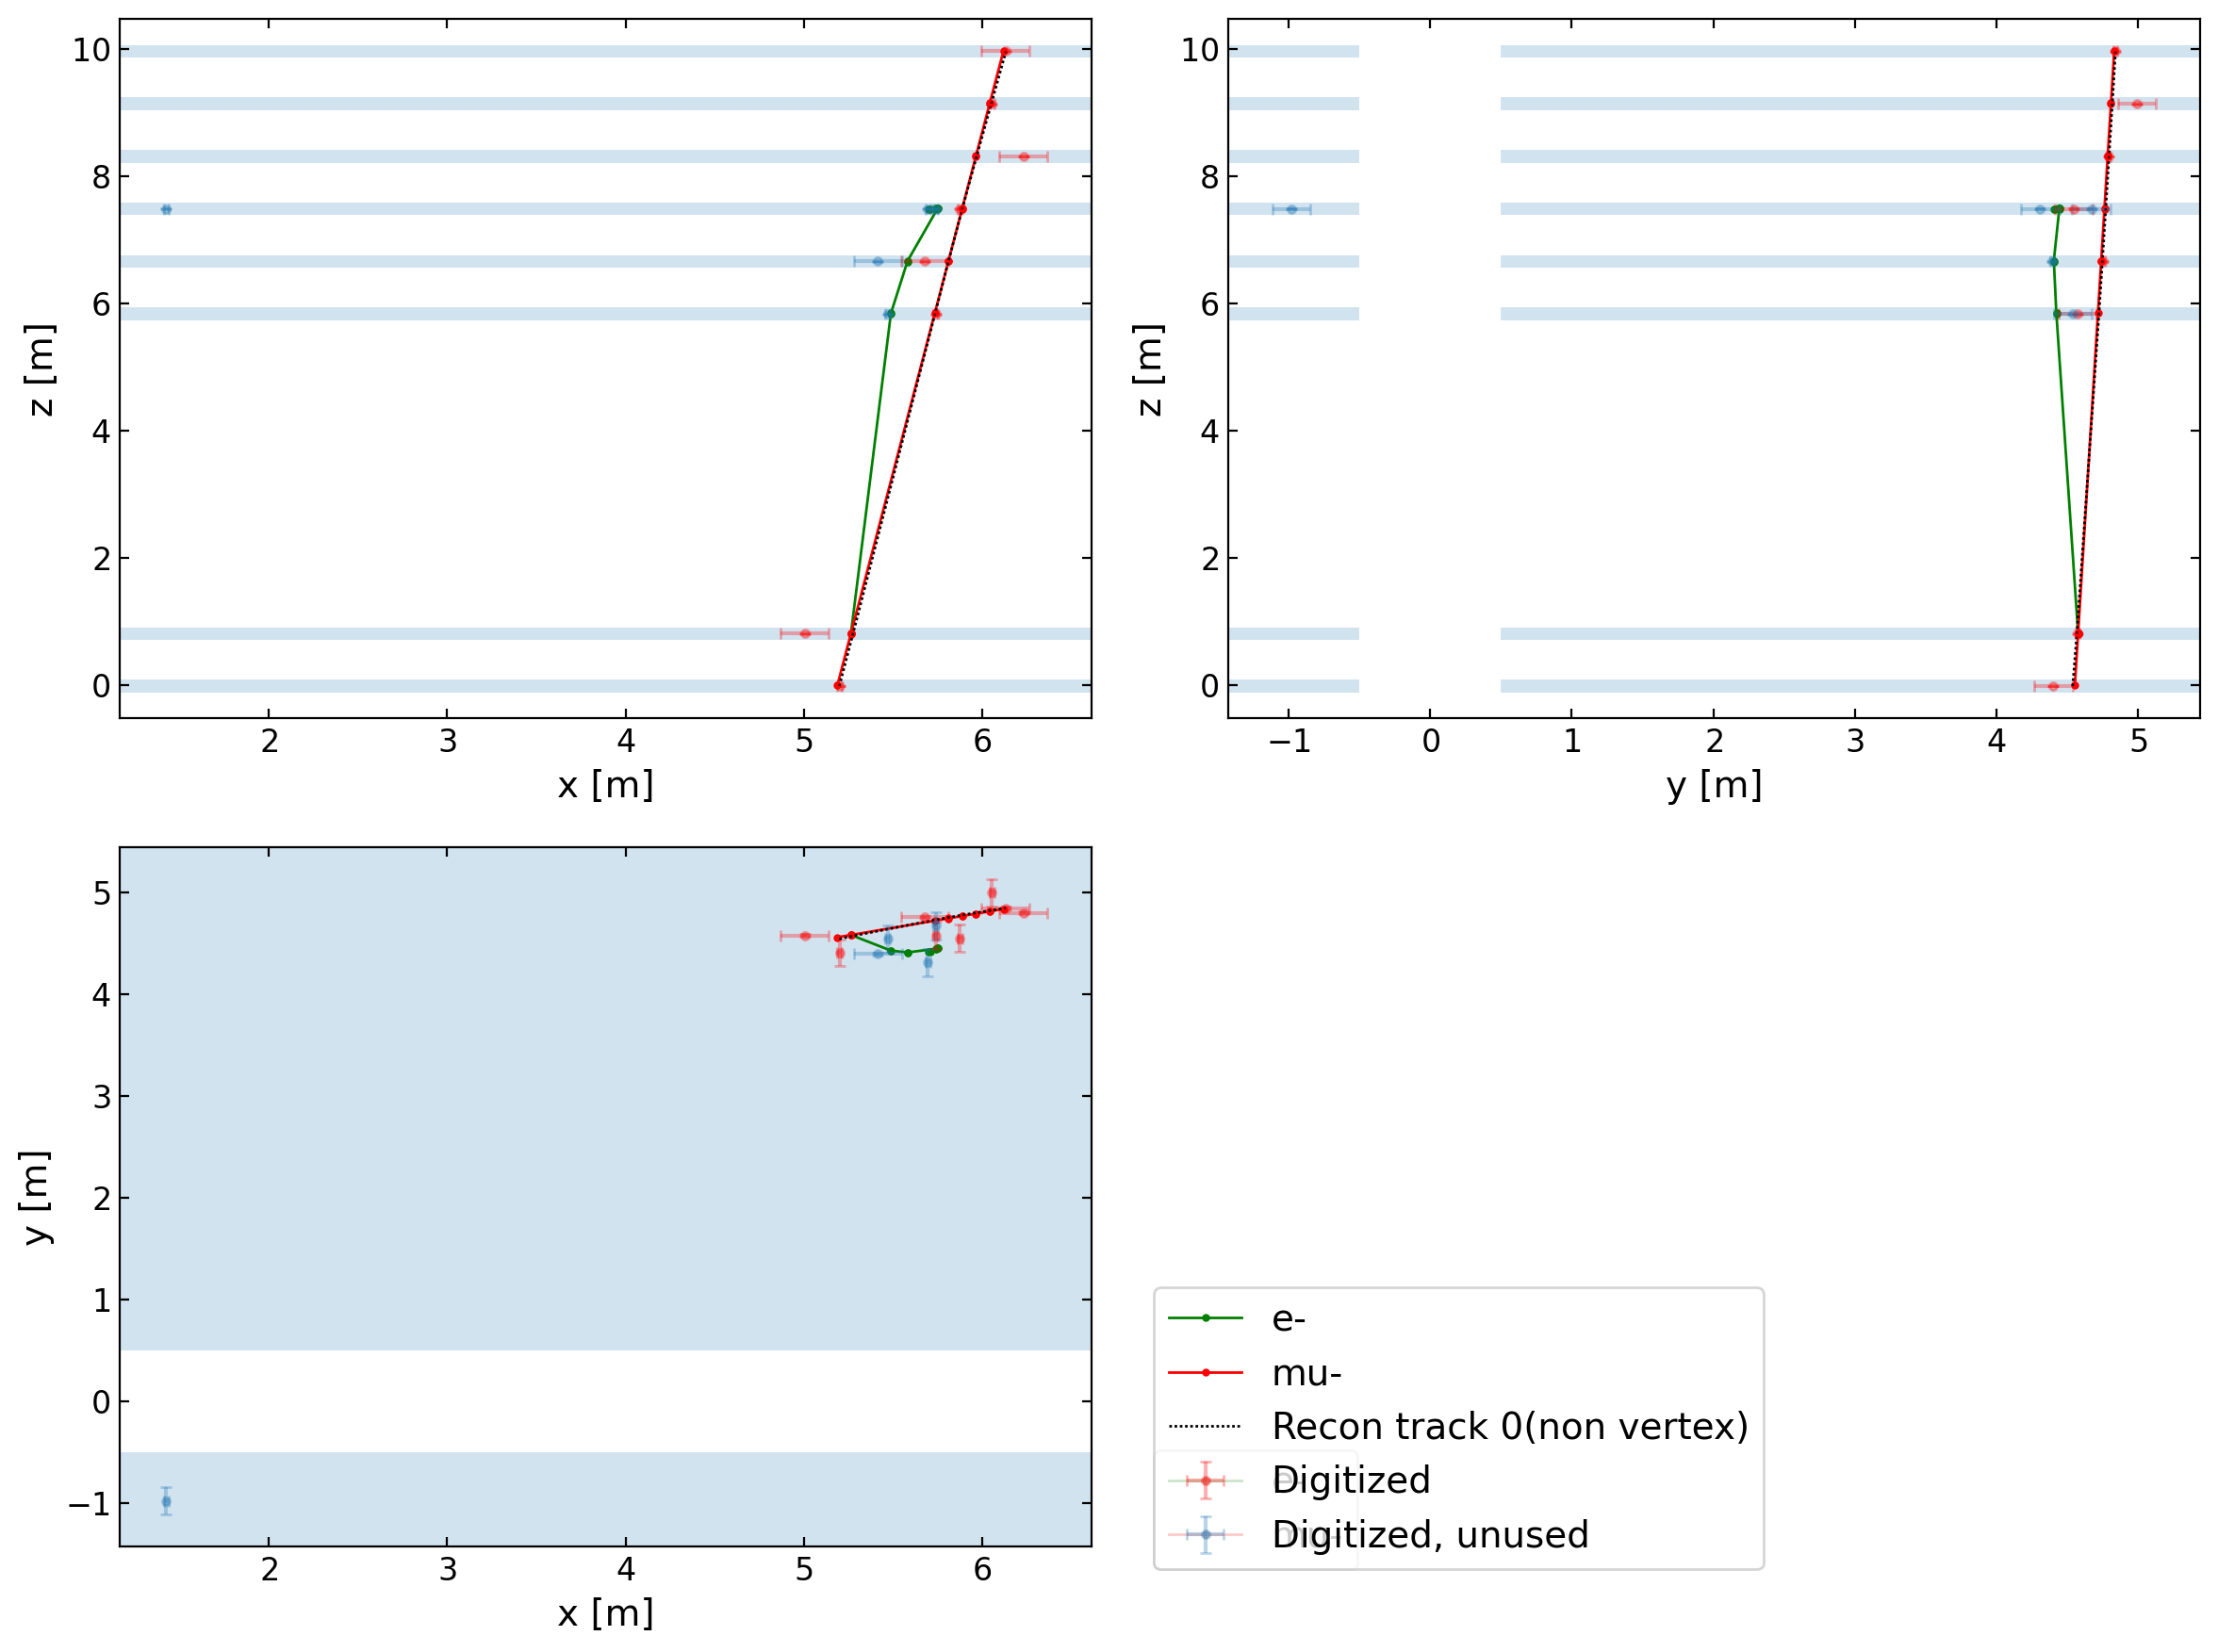

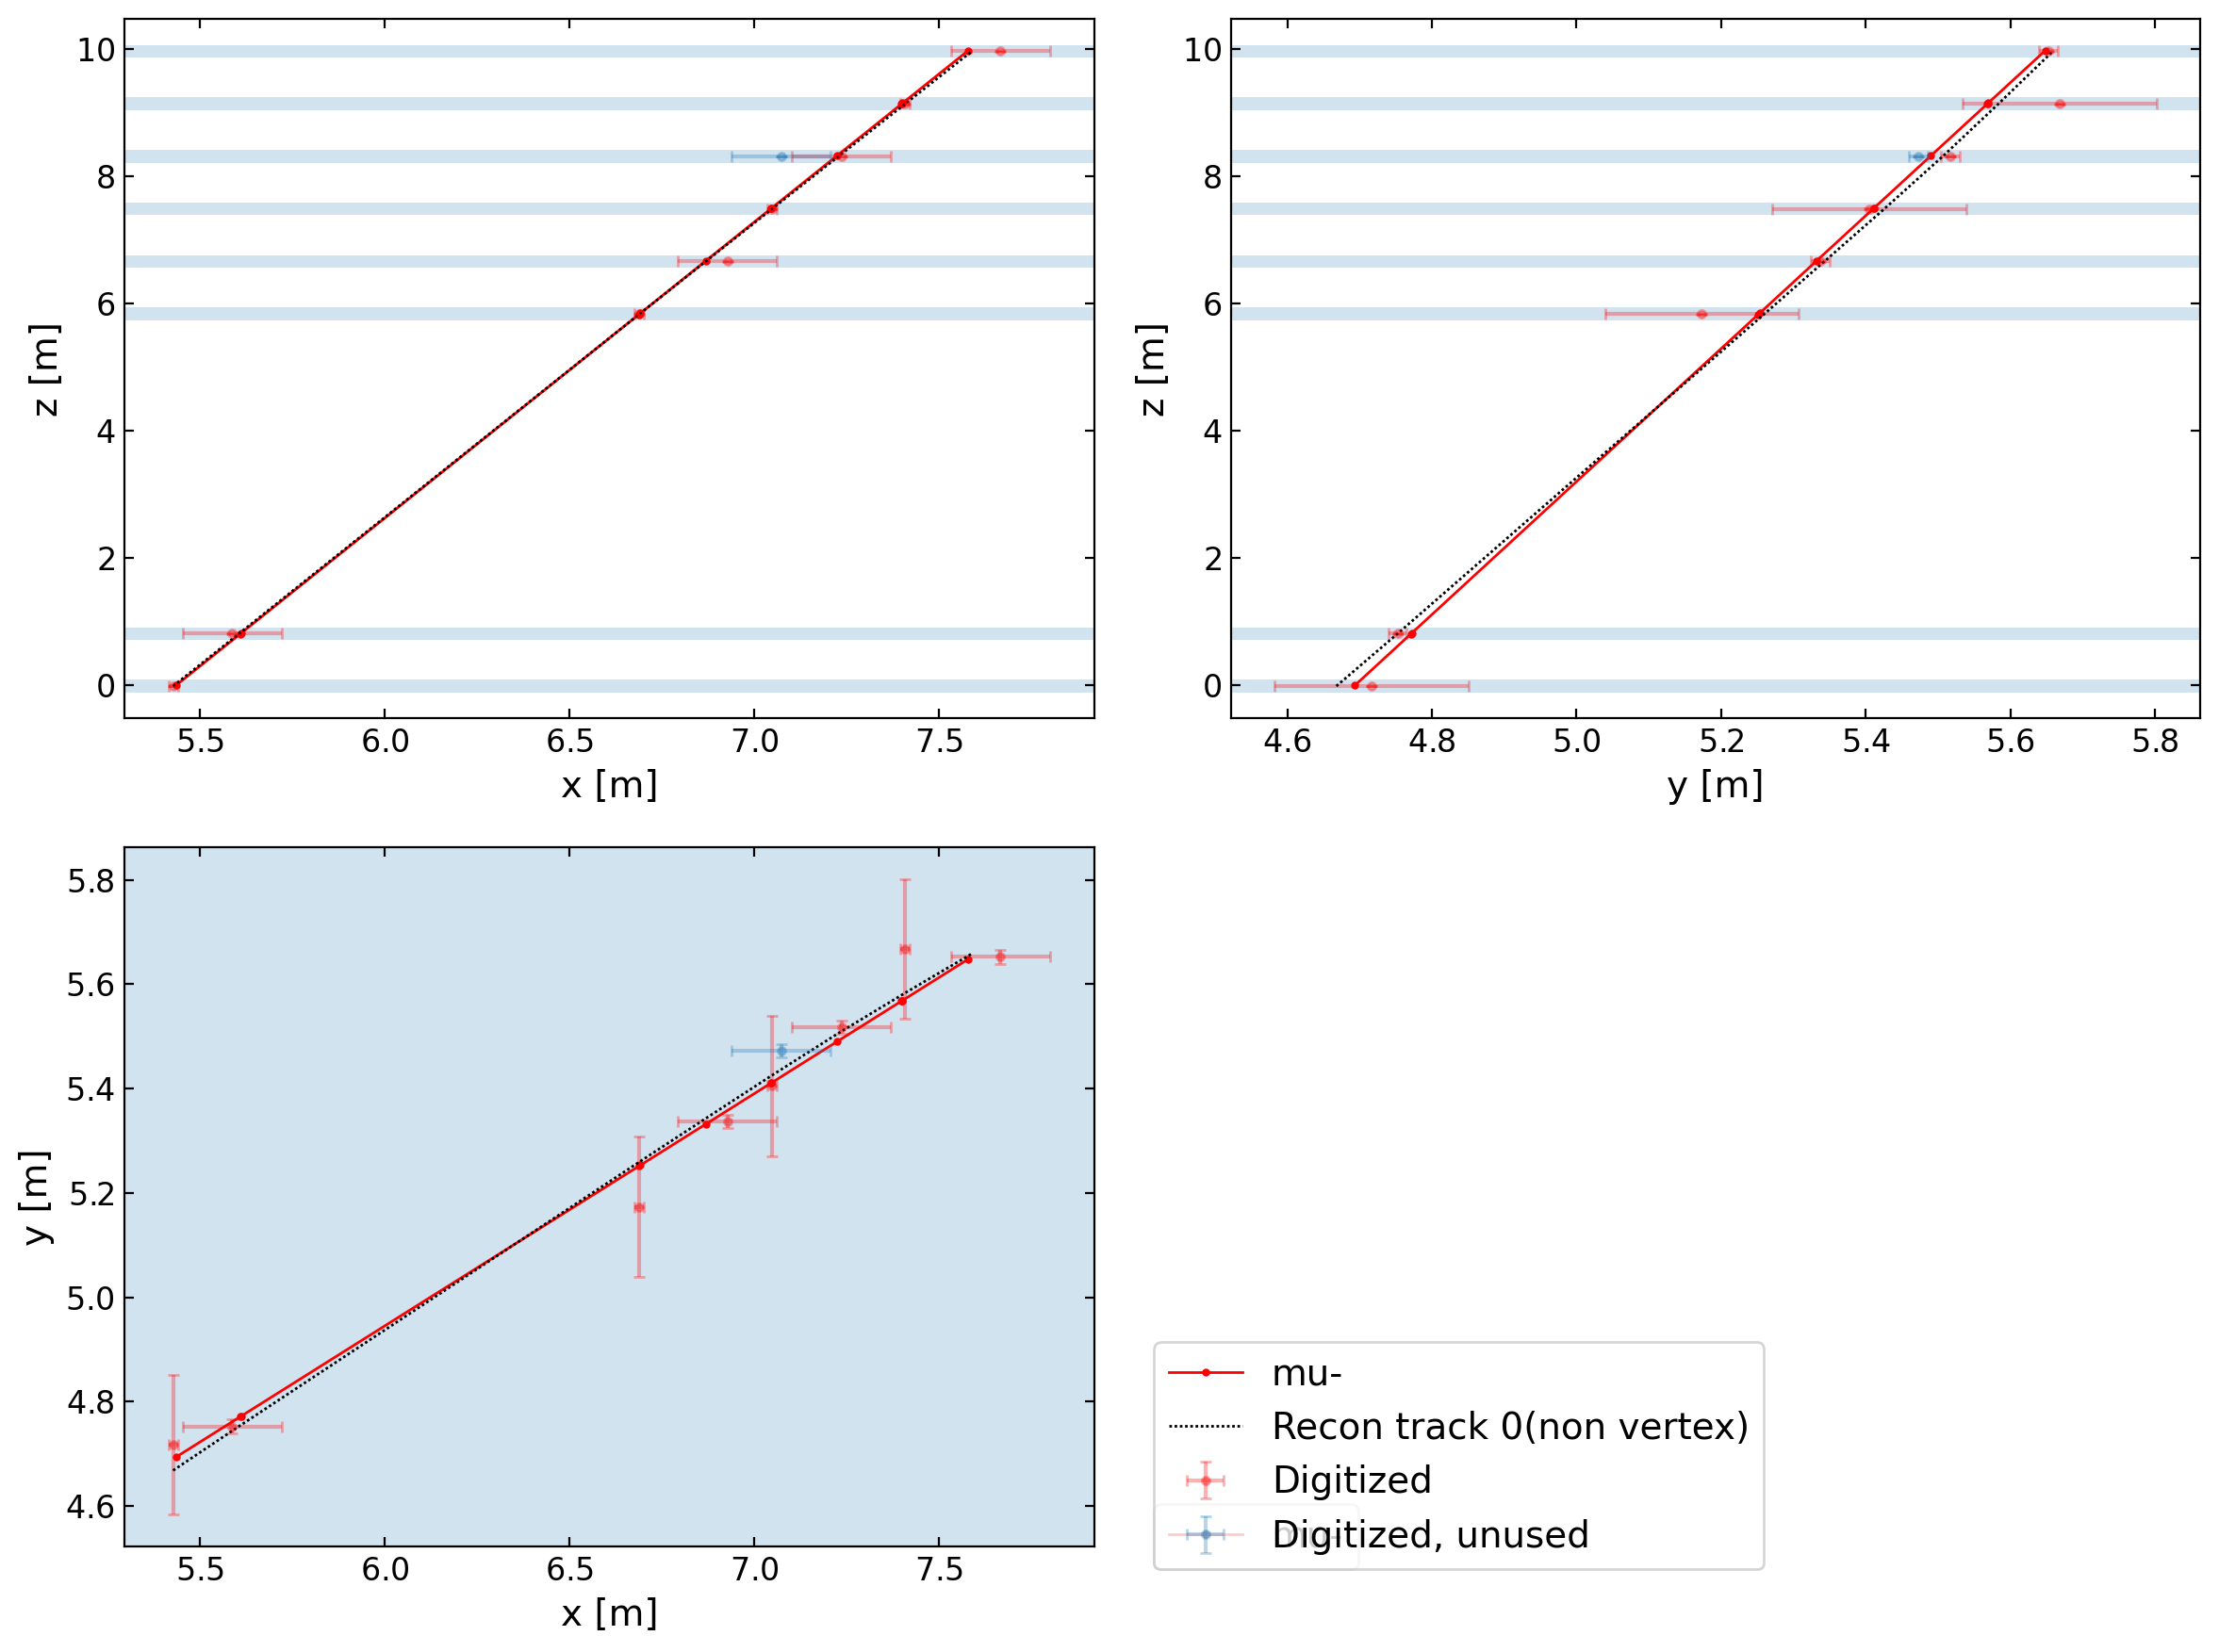

In [19]:
ev = event.Event(filename_fit, 0, tree_name=tree_name_fit)
nevents = int(ev.Tree.GetEntries())
cut=cutflow.sample_space("")

nplots=0

for i_event in range(200):
    ev.EventNumber=i_event
    ev.Tree.GetEntry(i_event)
    Digi_pdg_id = np.array([ev.Tree.Digi_pdg_id[i] for i in range(len(ev.Tree.Digi_pdg_id))])
    # if sum(Digi_pdg_id==211)<=3:
    if 1:
        fig,axs=plt.subplots(2,2,figsize=(12,9))
        fig = vis.plot_truth(ev,fig=fig, disp_det_view=False, disp_vertex=False, disp_first_hit=False);
        fig = vis.plot_recon(ev,fig=fig, disp_det_view=True, disp_recon_vertex=False);
        plt.show()
        nplots+=1
        if nplots>10:
            break
        
